# ÁRBOLES DE BARCELONA: ANÁLISIS DE DATOS
====================================================================

## 1. INTRODUCCIÓN

In [168]:
"""
Este proyecto analiza el arbolado urbano de Barcelona utilizando datos abiertos del Ayuntamiento 
(https://opendata-ajuntament.barcelona.cat/data/ca/dataset/arbrat-zona).
El objetivo es identificar patrones en la distribución, especies y características del
arbolado para comprender mejor el patrimonio natural de la ciudad.
"""

'\nEste proyecto analiza el arbolado urbano de Barcelona utilizando datos abiertos del Ayuntamiento \n(https://opendata-ajuntament.barcelona.cat/data/ca/dataset/arbrat-zona).\nEl objetivo es identificar patrones en la distribución, especies y características del\narbolado para comprender mejor el patrimonio natural de la ciudad.\n'

## 2. CARGA Y UNIÓN DE DATOS

### 2.1 Importación de bibliotecas

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [170]:
# Silenciar todas las advertencias
import warnings
warnings.filterwarnings('ignore')

### 2.2 Carga de datasets

In [171]:
# Cargar los datasets
df_arbrat = pd.read_csv(r'C:\Users\carlo\Documentos\proyectos\arbrat\data\raw\arbrat_2025.csv', encoding='utf-8')
df_parcs = pd.read_csv(r'C:\Users\carlo\Documentos\proyectos\arbrat\data\raw\arbrat_parcs.csv', encoding='utf-8')
df_zones = pd.read_csv(r'C:\Users\carlo\Documentos\proyectos\arbrat\data\raw\arbrat_zones.csv', encoding='utf-8')

### 2.3 Exploración inicial de los datasets

In [172]:
# Mostrar las primeras filas de cada dataset
print("🔍 Columnas en arbrat_2025:")
print(df_arbrat.info(), "\n")

print("📌 arbrat_2025.csv")
print(df_arbrat.head(), "\n")

🔍 Columnas en arbrat_2025:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146901 entries, 0 to 146900
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   codi               146901 non-null  object 
 1   x_etrs89           146901 non-null  float64
 2   y_etrs89           146901 non-null  float64
 3   latitud            146901 non-null  float64
 4   longitud           146901 non-null  float64
 5   tipus_element      146901 non-null  object 
 6   espai_verd         31033 non-null   object 
 7   adreca             146901 non-null  object 
 8   cat_especie_id     146901 non-null  int64  
 9   cat_nom_cientific  146901 non-null  object 
 10  cat_nom_castella   144079 non-null  object 
 11  cat_nom_catala     143852 non-null  object 
 12  categoria_arbrat   146844 non-null  object 
 13  data_plantacio     29387 non-null   object 
 14  tipus_aigua        6724 non-null    object 
 15  tipus_reg          14689

In [173]:
print("🔍 Columnas en arbrat_parcs:")
print(df_parcs.info(), "\n")

print("📌 arbrat_parcs.csv")
print(df_parcs.head(), "\n")


🔍 Columnas en arbrat_parcs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34357 entries, 0 to 34356
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   codi               34357 non-null  object 
 1   x_etrs89           34357 non-null  float64
 2   y_etrs89           34357 non-null  float64
 3   latitud            34357 non-null  float64
 4   longitud           34357 non-null  float64
 5   tipus_element      34357 non-null  object 
 6   espai_verd         34239 non-null  object 
 7   adreca             34357 non-null  object 
 8   cat_especie_id     34357 non-null  int64  
 9   cat_nom_cientific  34357 non-null  object 
 10  cat_nom_castella   34023 non-null  object 
 11  cat_nom_catala     33996 non-null  object 
 12  categoria_arbrat   34306 non-null  object 
 13  data_plantacio     1295 non-null   object 
 14  tipus_aigua        697 non-null    object 
 15  tipus_reg          34349 non-null  object 

In [174]:
print("🔍 Columnas en arbrat_zones:")
print(df_zones.info(), "\n")
print("📌 arbrat_zones.csv")
print(df_zones.head(), "\n")


🔍 Columnas en arbrat_zones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43043 entries, 0 to 43042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   codi               43043 non-null  object 
 1   x_etrs89           43043 non-null  float64
 2   y_etrs89           43043 non-null  float64
 3   latitud            43043 non-null  float64
 4   longitud           43043 non-null  float64
 5   tipus_element      43043 non-null  object 
 6   espai_verd         40522 non-null  object 
 7   adreca             43043 non-null  object 
 8   cat_especie_id     43043 non-null  int64  
 9   cat_nom_cientific  43043 non-null  object 
 10  cat_nom_castella   42267 non-null  object 
 11  cat_nom_catala     42208 non-null  object 
 12  categoria_arbrat   42991 non-null  object 
 13  data_plantacio     3838 non-null   object 
 14  tipus_aigua        2903 non-null   object 
 15  tipus_reg          43019 non-null  object 

### 2.4 Unificación de datasets y eliminación de duplicados

In [175]:
# Comprobamos si tienen columnas similares
print("Columnas en arbrat_2025:", df_arbrat.columns.tolist())
print("Columnas en arbrat_parcs:", df_parcs.columns.tolist())

# Si coinciden, concatenamos
df_union = pd.concat([df_arbrat, df_parcs], ignore_index=True)

# Eliminamos duplicados basándonos únicamente en la columna 'codi'
df_union = df_union.drop_duplicates(subset=['codi'])

print("Total de registros combinados sin duplicados:", len(df_union))


Columnas en arbrat_2025: ['codi', 'x_etrs89', 'y_etrs89', 'latitud', 'longitud', 'tipus_element', 'espai_verd', 'adreca', 'cat_especie_id', 'cat_nom_cientific', 'cat_nom_castella', 'cat_nom_catala', 'categoria_arbrat', 'data_plantacio', 'tipus_aigua', 'tipus_reg', 'geom', 'catalogacio', 'codi_barri', 'nom_barri', 'codi_districte', 'nom_districte']
Columnas en arbrat_parcs: ['codi', 'x_etrs89', 'y_etrs89', 'latitud', 'longitud', 'tipus_element', 'espai_verd', 'adreca', 'cat_especie_id', 'cat_nom_cientific', 'cat_nom_castella', 'cat_nom_catala', 'categoria_arbrat', 'data_plantacio', 'tipus_aigua', 'tipus_reg', 'geom', 'catalogacio', 'codi_barri', 'nom_barri', 'codi_districte', 'nom_districte']
Total de registros combinados sin duplicados: 181193


In [176]:
# Comprobamos si tienen columnas similares
print("Columnas en df_union:", df_union.columns.tolist())
print("Columnas en arbrat_zones:", df_zones.columns.tolist())

# Si coinciden, concatenamos
df_final = pd.concat([df_union, df_zones], ignore_index=True)

# Eliminamos duplicados basándonos únicamente en la columna 'codi'
df_final = df_final.drop_duplicates(subset=['codi'])

print("Total de registros combinados sin duplicados:", len(df_final))


Columnas en df_union: ['codi', 'x_etrs89', 'y_etrs89', 'latitud', 'longitud', 'tipus_element', 'espai_verd', 'adreca', 'cat_especie_id', 'cat_nom_cientific', 'cat_nom_castella', 'cat_nom_catala', 'categoria_arbrat', 'data_plantacio', 'tipus_aigua', 'tipus_reg', 'geom', 'catalogacio', 'codi_barri', 'nom_barri', 'codi_districte', 'nom_districte']
Columnas en arbrat_zones: ['codi', 'x_etrs89', 'y_etrs89', 'latitud', 'longitud', 'tipus_element', 'espai_verd', 'adreca', 'cat_especie_id', 'cat_nom_cientific', 'cat_nom_castella', 'cat_nom_catala', 'categoria_arbrat', 'data_plantacio', 'tipus_aigua', 'tipus_reg', 'geom', 'catalogacio', 'codi_barri', 'nom_barri', 'codi_districte', 'nom_districte']
Total de registros combinados sin duplicados: 224171


In [177]:
df_final.head().sort_index(ascending=True)

,codi,x_etrs89,y_etrs89,latitud,longitud,tipus_element,espai_verd,adreca,cat_especie_id,cat_nom_cientific,...,categoria_arbrat,data_plantacio,tipus_aigua,tipus_reg,geom,catalogacio,codi_barri,nom_barri,codi_districte,nom_districte
0,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',...,PRIMERA,2022-02-15,NaN,GOTEIG AVARIAT,POINT (430270.561661092 4587637.99844993),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS
1,0000028AR,430278.453,4587643.703,41.437339,2.165447,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',...,PRIMERA,2022-02-15,NaN,GOTEIG AVARIAT,POINT (430278.452565526 4587643.70285161),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS
2,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,SEGONA,NaN,NaN,SENSE INFORMAR,POINT (430035.238676006 4587693.83631125),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ
3,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,SEGONA,NaN,NaN,SENSE INFORMAR,POINT (430032.831137134 4587696.00500337),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ
4,0000388AR,430030.367,4587698.393,41.437810,2.162471,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,SEGONA,NaN,NaN,SENSE INFORMAR,POINT (430030.366746935 4587698.39336605),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ


In [178]:
import os

# Crear la carpeta 'clean' si no existe
clean_folder = r'C:\Users\carlo\Documentos\proyectos\arbrat\data\clean'
os.makedirs(clean_folder, exist_ok=True)

# Exportar el DataFrame a archivos CSV
try:
    df_final.to_csv(os.path.join(clean_folder, 'arbres_clean.csv'), index=False, encoding='utf-8')
except PermissionError:
    print("El archivo ya existe o está siendo utilizado. Ignorando la operación.")

In [271]:
df = df_final.copy()

## 3. ANÁLISIS EXPLORATORIO INICIAL

In [251]:
"""
En esta sección realizamos un primer análisis exploratorio del dataset unificado
para comprender su estructura, distribución y posibles problemas antes de
proceder con la limpieza detallada.
"""

'\nEn esta sección realizamos un primer análisis exploratorio del dataset unificado\npara comprender su estructura, distribución y posibles problemas antes de\nproceder con la limpieza detallada.\n'

### 3.1 Descripción general del dataset unificado


In [252]:
df.columns

Index(['codi', 'x_etrs89', 'y_etrs89', 'latitud', 'longitud', 'tipus_element',
       'espai_verd', 'adreca', 'cat_especie_id', 'cat_nom_cientific',
       'cat_nom_castella', 'cat_nom_catala', 'categoria_arbrat',
       'data_plantacio', 'tipus_aigua', 'tipus_reg', 'geom', 'catalogacio',
       'codi_barri', 'nom_barri', 'codi_districte', 'nom_districte'],
      dtype='object')

In [253]:
# Dimensiones del dataset
print(f"El dataset unificado contiene {df_final.shape[0]} filas y {df_final.shape[1]} columnas.")

# Primeras filas
print("\nPrimeras 5 filas del dataset unificado:")
display(df_final.head())

El dataset unificado contiene 224171 filas y 22 columnas.

Primeras 5 filas del dataset unificado:


,codi,x_etrs89,y_etrs89,latitud,longitud,tipus_element,espai_verd,adreca,cat_especie_id,cat_nom_cientific,...,categoria_arbrat,data_plantacio,tipus_aigua,tipus_reg,geom,catalogacio,codi_barri,nom_barri,codi_districte,nom_districte
0,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',...,PRIMERA,2022-02-15,NaN,GOTEIG AVARIAT,POINT (430270.561661092 4587637.99844993),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS
1,0000028AR,430278.453,4587643.703,41.437339,2.165447,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',...,PRIMERA,2022-02-15,NaN,GOTEIG AVARIAT,POINT (430278.452565526 4587643.70285161),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS
2,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,SEGONA,NaN,NaN,SENSE INFORMAR,POINT (430035.238676006 4587693.83631125),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ
3,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,SEGONA,NaN,NaN,SENSE INFORMAR,POINT (430032.831137134 4587696.00500337),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ
4,0000388AR,430030.367,4587698.393,41.437810,2.162471,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,SEGONA,NaN,NaN,SENSE INFORMAR,POINT (430030.366746935 4587698.39336605),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ


### 3.2 Análisis de tipos de datos


In [254]:
# Información sobre tipos de datos y valores no nulos
print("\nInformación sobre tipos de datos y valores no nulos:")
df_final.info()

# Resumen estadístico de variables numéricas
print("\nResumen estadístico de variables numéricas:")
display(df_final.describe())


Información sobre tipos de datos y valores no nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 224171 entries, 0 to 224235
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   codi               224171 non-null  object 
 1   x_etrs89           224171 non-null  float64
 2   y_etrs89           224171 non-null  float64
 3   latitud            224171 non-null  float64
 4   longitud           224171 non-null  float64
 5   tipus_element      224171 non-null  object 
 6   espai_verd         105722 non-null  object 
 7   adreca             224171 non-null  object 
 8   cat_especie_id     224171 non-null  int64  
 9   cat_nom_cientific  224171 non-null  object 
 10  cat_nom_castella   220239 non-null  object 
 11  cat_nom_catala     219926 non-null  object 
 12  categoria_arbrat   224107 non-null  object 
 13  data_plantacio     34510 non-null   object 
 14  tipus_aigua        10324 non-null   object 
 15  ti

,x_etrs89,y_etrs89,latitud,longitud,cat_especie_id,codi_barri,codi_districte
count,224171.000000,2.241710e+05,224171.000000,224171.000000,2.241710e+05,224156.000000,224166.000000
mean,430347.623066,4.584158e+06,41.405951,2.166680,3.521483e+05,36.009074,6.066478
std,2274.743269,2.739455e+03,0.024753,0.027087,1.296482e+06,22.885045,2.975496
min,423866.043000,4.577401e+06,41.344797,2.088837,1.100000e+01,1.000000,1.000000
25%,428557.551000,4.582132e+06,41.387631,2.145323,1.260000e+02,14.000000,3.000000
50%,430405.471000,4.584129e+06,41.405769,2.167329,6.210000e+02,32.000000,6.000000
75%,432211.847000,4.586312e+06,41.425372,2.188827,1.104000e+03,59.000000,9.000000
max,435346.645000,4.591006e+06,41.467776,2.226435,5.287674e+06,73.000000,10.000000


### 3.3 Identificación de valores ausentes



Valores nulos por columna:


,Valores nulos,Porcentaje (%)
catalogacio,223025,99.49
tipus_aigua,213847,95.39
data_plantacio,189661,84.61
espai_verd,118449,52.84
cat_nom_catala,4245,1.89
cat_nom_castella,3932,1.75
categoria_arbrat,64,0.03
tipus_reg,25,0.01
nom_barri,15,0.01
codi_barri,15,0.01


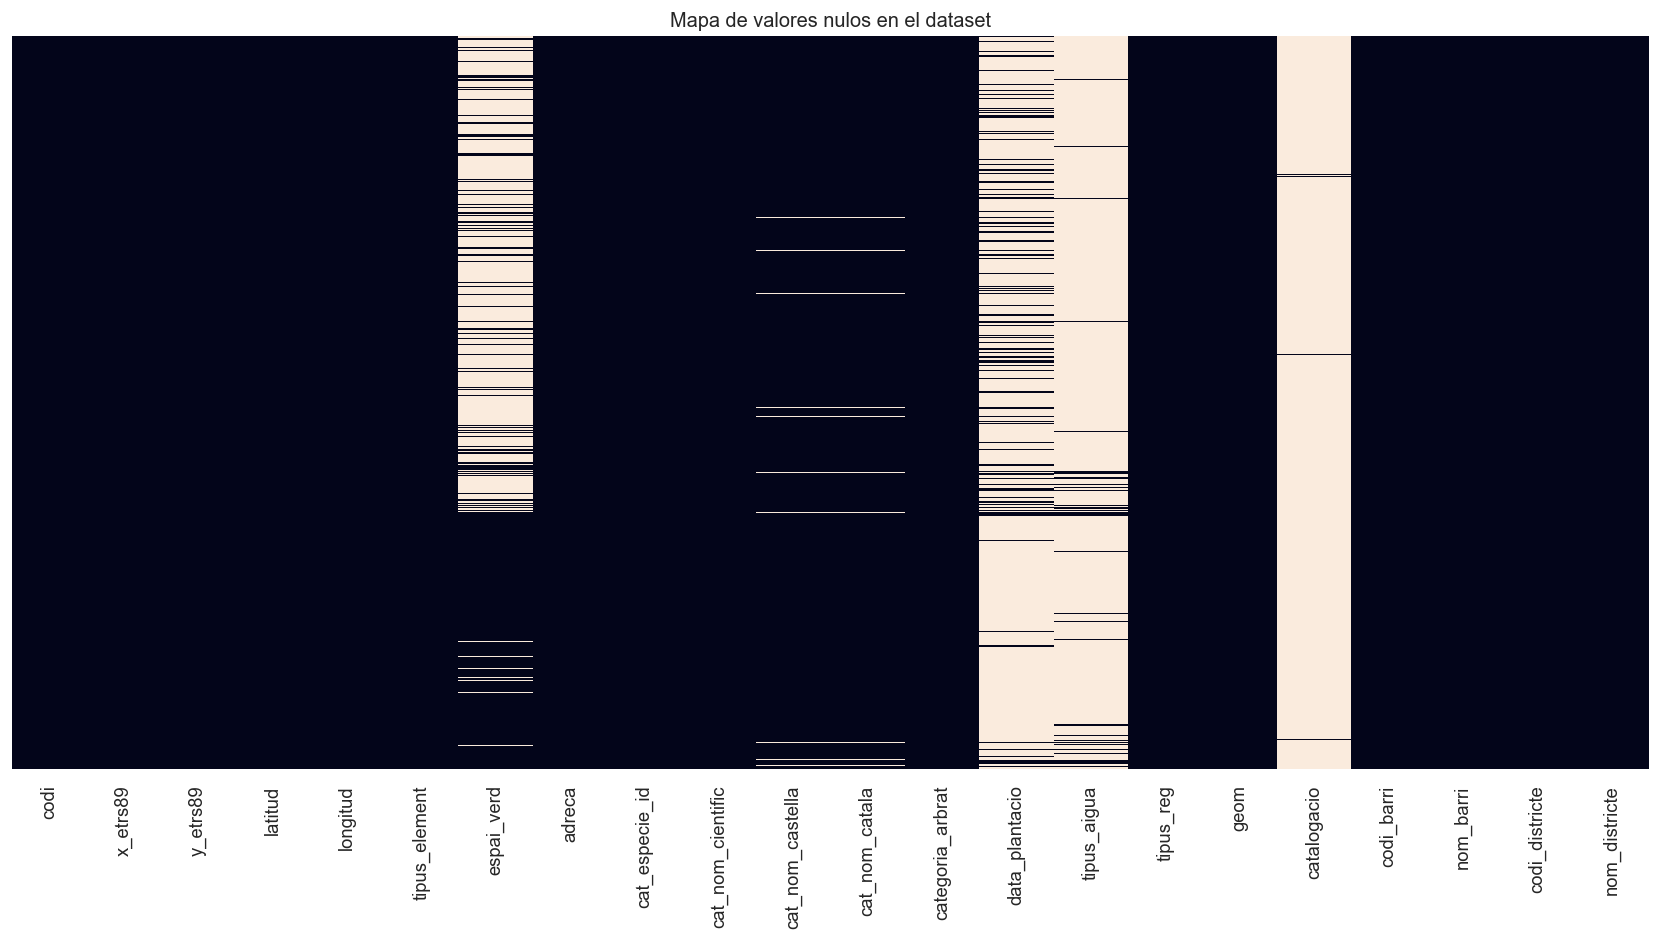

In [255]:
# Conteo total de valores nulos por columna
valores_nulos = df_final.isnull().sum()
porcentaje_nulos = (valores_nulos / len(df_final)) * 100

# Crear DataFrame para mejor visualización
df_nulos = pd.DataFrame({
    'Valores nulos': valores_nulos,
    'Porcentaje (%)': porcentaje_nulos.round(2)
})

print("\nValores nulos por columna:")
display(df_nulos.sort_values('Valores nulos', ascending=False))

# Visualización de valores nulos
plt.figure(figsize=(14, 8))
sns.heatmap(df_final.isnull(), cbar=False, yticklabels=False)
plt.title('Mapa de valores nulos en el dataset')
plt.tight_layout()
plt.show()


### 3.4 Distribución general de variables clave



Distribución por tipo de elemento:


tipus_element
ARBRE VIARI        142344
ARBRE ZONA          41390
ARBRE PARC          32021
PALMERA VIARI        4496
PALMERA PARC         2278
PALMERA ZONA         1609
ARBRE PRIVAT           27
PALMERA PRIVADA         6
Name: count, dtype: int64

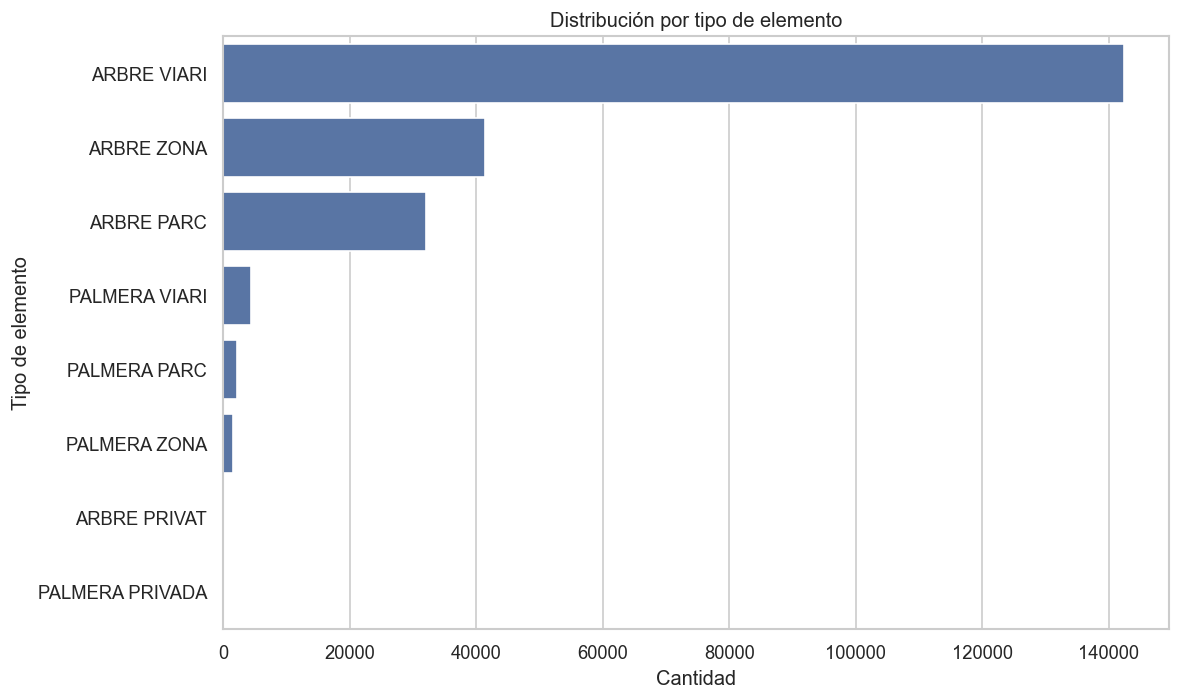


Distribución por distrito:


nom_districte
SANT MARTÍ               41878
SANTS - MONTJUÏC         29960
EIXAMPLE                 24439
NOU BARRIS               24368
HORTA - GUINARDÓ         23310
SANT ANDREU              22141
SARRIÀ - SANT GERVASI    19237
LES CORTS                17563
GRÀCIA                   11454
CIUTAT VELLA              9816
Name: count, dtype: int64

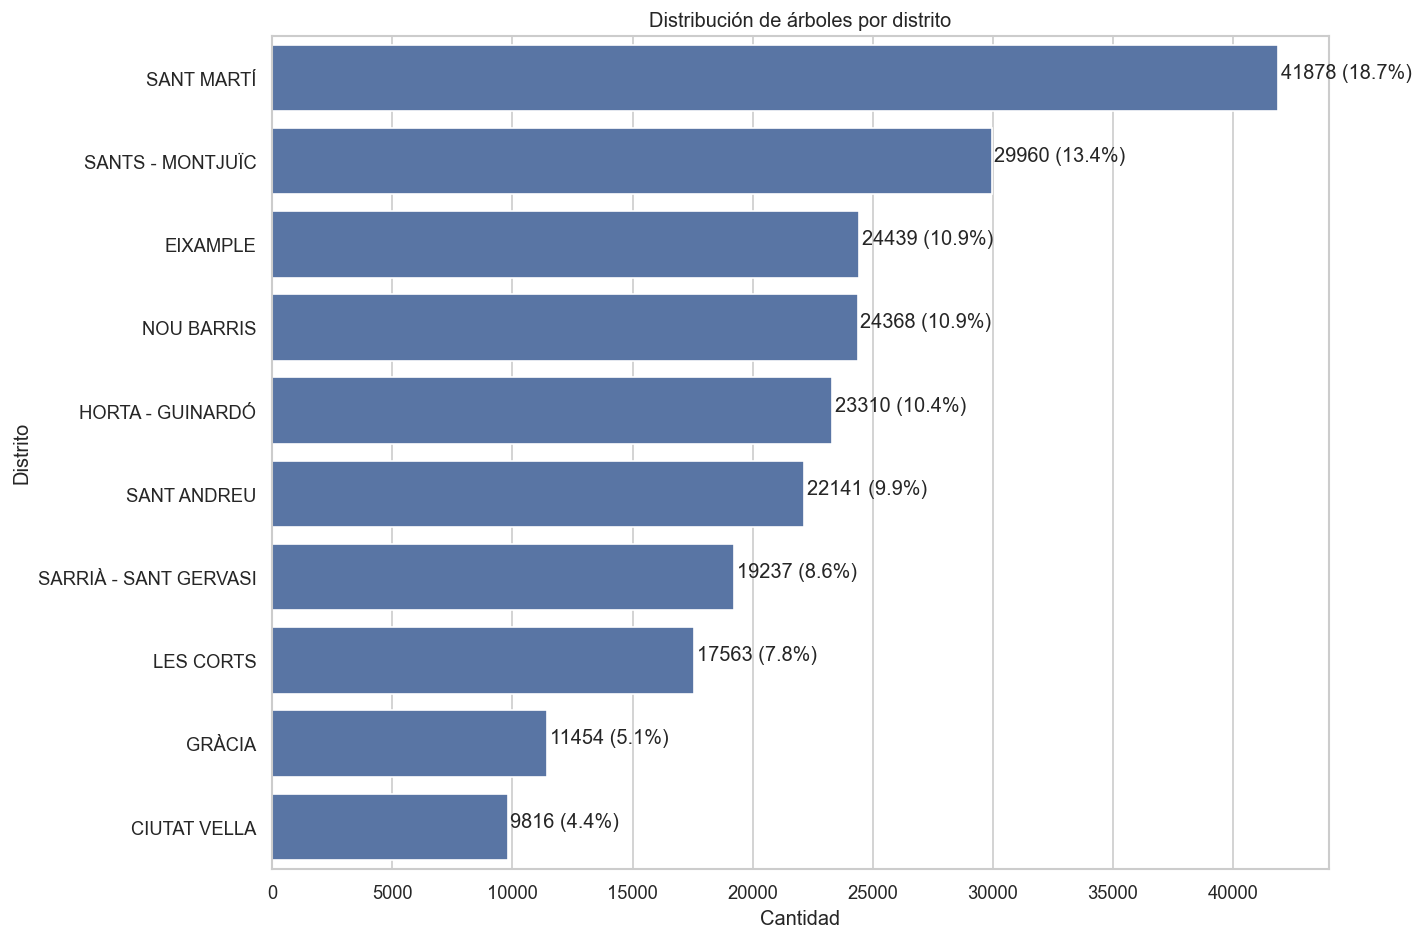


Especies más comunes (top 10):


cat_nom_cientific
Platanus × acerifolia      44763
Celtis australis           22579
Tipuana tipu               12457
Styphnolobium japonicum    10332
Pinus pinea                 8386
Melia azedarach             7450
Brachychiton populneus      6641
Ligustrum lucidum           5997
Jacaranda mimosifolia       5152
Pinus halepensis            5083
Name: count, dtype: int64

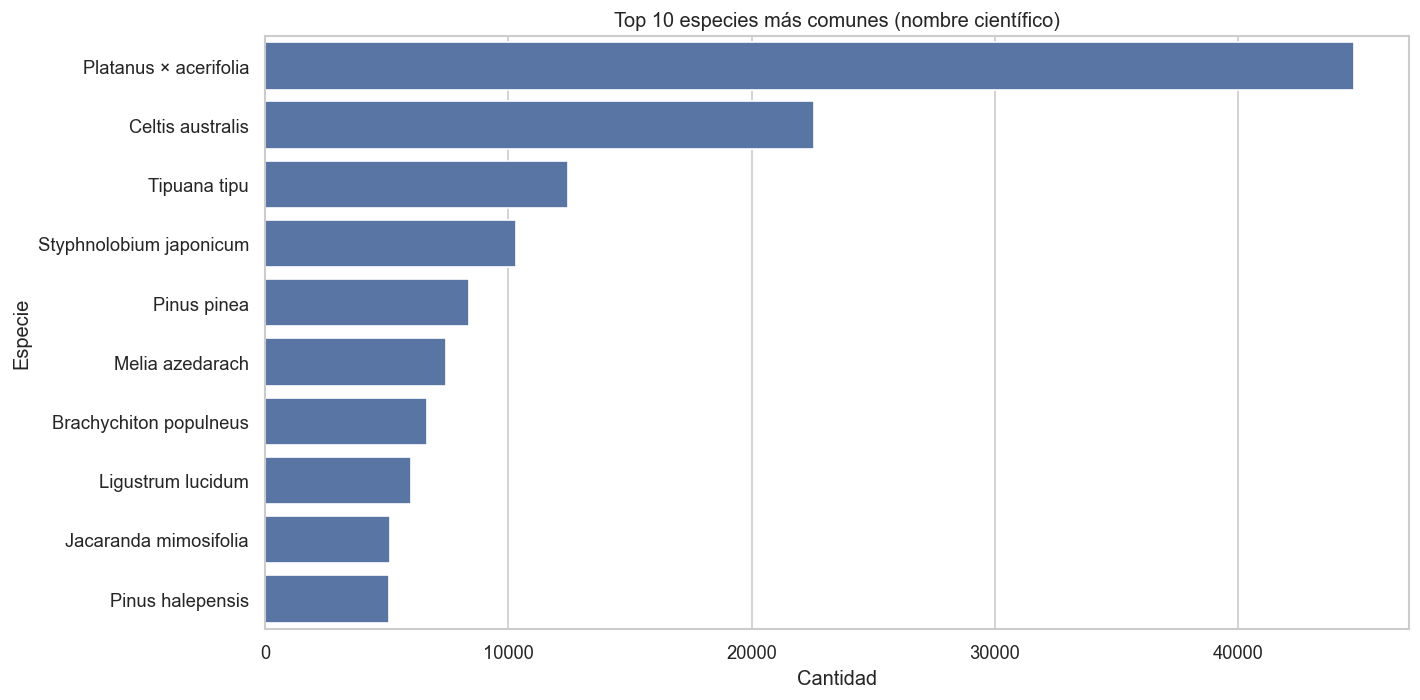

In [256]:
# Análisis de distribución por tipo de elemento
print("\nDistribución por tipo de elemento:")
tipo_elemento_counts = df_final['tipus_element'].value_counts()
display(tipo_elemento_counts)

plt.figure(figsize=(10, 6))
sns.countplot(y=df_final['tipus_element'], order=tipo_elemento_counts.index)
plt.title('Distribución por tipo de elemento')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de elemento')
plt.tight_layout()
plt.show()

# Análisis de distribución por distrito
print("\nDistribución por distrito:")
distrito_counts = df_final['nom_districte'].value_counts()
display(distrito_counts)

plt.figure(figsize=(12, 8))
ax = sns.countplot(y=df_final['nom_districte'], order=distrito_counts.index)
for i, count in enumerate(distrito_counts):
    ax.text(count + 100, i, f"{count} ({count/len(df_final)*100:.1f}%)")
plt.title('Distribución de árboles por distrito')
plt.xlabel('Cantidad')
plt.ylabel('Distrito')
plt.tight_layout()
plt.show()

# Análisis de las especies más comunes
print("\nEspecies más comunes (top 10):")
especies_counts = df_final['cat_nom_cientific'].value_counts().head(10)
display(especies_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=especies_counts.values, y=especies_counts.index)
plt.title('Top 10 especies más comunes (nombre científico)')
plt.xlabel('Cantidad')
plt.ylabel('Especie')
plt.tight_layout()
plt.show()


### 3.5 Detección de valores atípicos o inconsistentes



Valores únicos en campos categóricos principales:

Valores únicos en 'tipus_element':
['ARBRE VIARI' 'PALMERA VIARI' 'ARBRE PARC' 'ARBRE PRIVAT'
 'PALMERA PRIVADA' 'ARBRE ZONA' 'PALMERA ZONA' 'PALMERA PARC']
Total: 8 valores únicos

Valores únicos en 'categoria_arbrat':
['PRIMERA' 'SEGONA' 'EXEMPLAR' 'TERCERA' nan]
Total: 4 valores únicos

Valores únicos en 'tipus_reg':
['GOTEIG AVARIAT' 'SENSE INFORMAR' 'GOTEIG' 'ASPERSIÓ' 'DIFUSIÓ' 'MÀNEGA'
 nan 'ROTATOR' 'GOTEIG TANCAT SEQUERA' 'HIDROJARDINERA']
Total: 9 valores únicos

Valores únicos en 'tipus_aigua':
[nan 'POTABLE' 'FREÀTICA' 'REGENERADA']
Total: 3 valores únicos

Valores únicos en 'catalogacio':
[nan 'INTERÈS LOCAL']
Total: 1 valores únicos

Verificando inconsistencias en nombres:
Registros con '-' en cat_nom_catala: 5577
Registros con '-' en cat_nom_castella: 5577

Rango de coordenadas geográficas:
Latitud: 41.3447969 a 41.4677758
Longitud: 2.0888374 a 2.2264351

Registros con coordenadas fuera del rango esperado para Barcelona

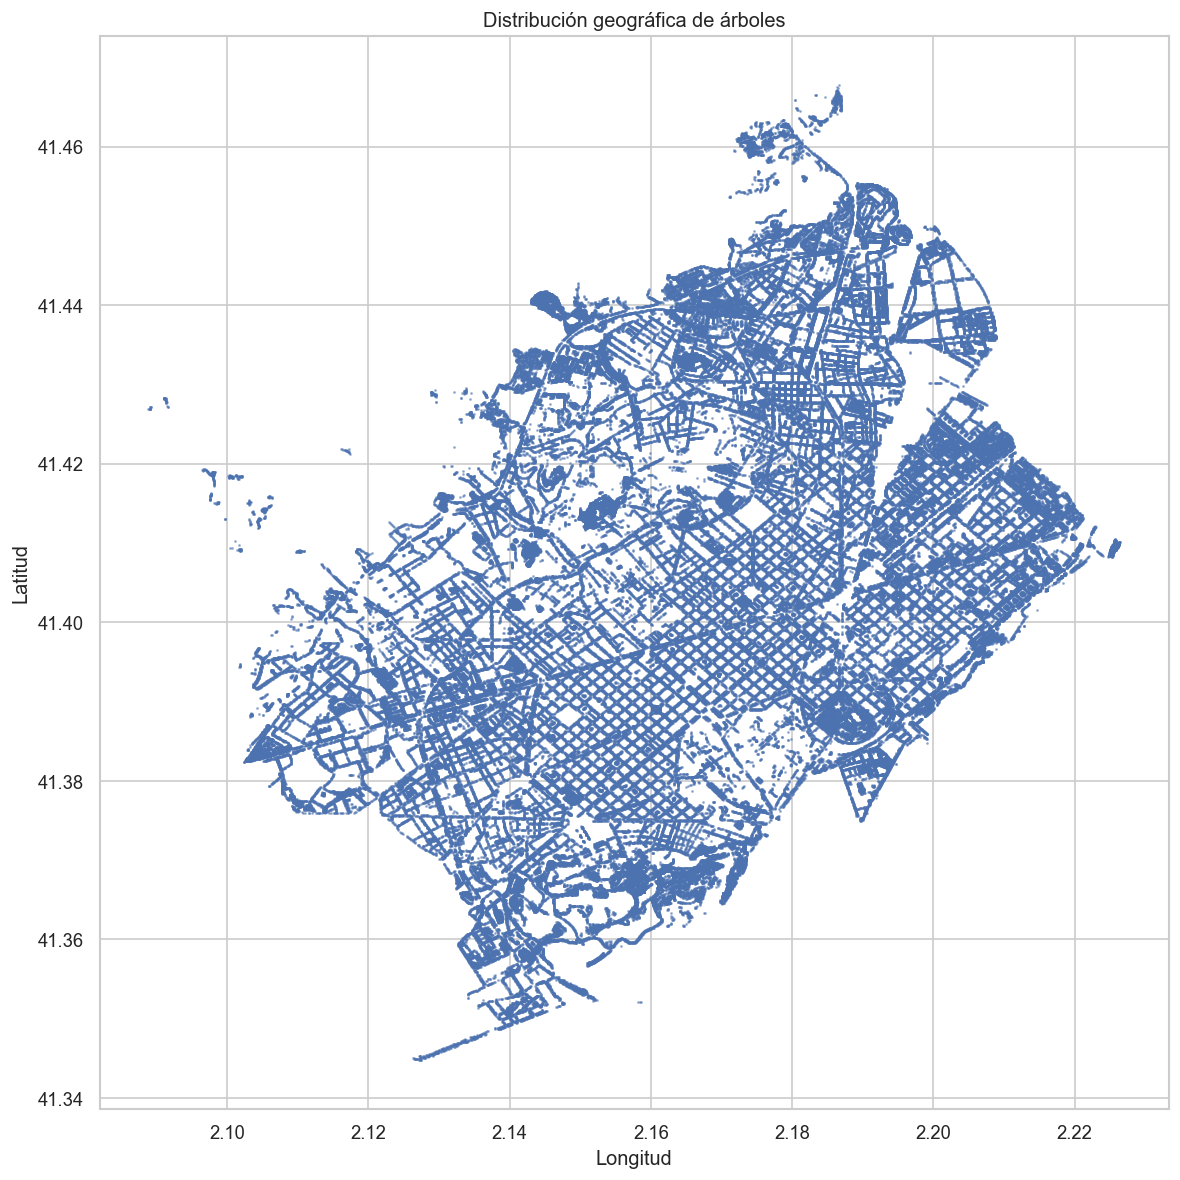


Conclusiones del análisis exploratorio inicial:

1. El dataset unificado contiene más de 220,000 árboles con 22 variables distintas.
2. Se han identificado múltiples columnas con valores nulos, especialmente en 'data_plantacio', 'tipus_aigua' y 'espai_verd'.
3. Los tipos de elementos más comunes son árboles viarios, seguidos por árboles de parque y de zona.
4. Se observa una distribución desigual entre distritos, con mayor concentración en algunos como Sant Martí y Nou Barris.
5. Se han detectado algunos valores inconsistentes en los campos de nombres que requieren tratamiento.
6. Las coordenadas geográficas parecen estar dentro de los rangos esperados para Barcelona, con algunas excepciones que deberán revisarse.
7. Es necesario un tratamiento detallado de valores nulos para optimizar el dataset para análisis posteriores.
      


In [257]:
# Análisis de valores únicos en campos categóricos
print("\nValores únicos en campos categóricos principales:")
for columna in ['tipus_element', 'categoria_arbrat', 'tipus_reg', 'tipus_aigua', 'catalogacio']:
    print(f"\nValores únicos en '{columna}':")
    print(df_final[columna].unique())
    print(f"Total: {df_final[columna].nunique()} valores únicos")

# Verificación de valores inconsistentes en nombres
print("\nVerificando inconsistencias en nombres:")
valores_problematicos = df_final[df_final['cat_nom_catala'] == '-']
print(f"Registros con '-' en cat_nom_catala: {len(valores_problematicos)}")

valores_problematicos = df_final[df_final['cat_nom_castella'] == '-']
print(f"Registros con '-' en cat_nom_castella: {len(valores_problematicos)}")

# Análisis de coordenadas geográficas
print("\nRango de coordenadas geográficas:")
print(f"Latitud: {df_final['latitud'].min()} a {df_final['latitud'].max()}")
print(f"Longitud: {df_final['longitud'].min()} a {df_final['longitud'].max()}")

# Verificar si hay coordenadas fuera del rango esperado para Barcelona
barcelona_bounds = {
    'lat_min': 41.3, 'lat_max': 41.5,
    'lon_min': 2.0, 'lon_max': 2.3
}

fuera_rango = df_final[
    (df_final['latitud'] < barcelona_bounds['lat_min']) | 
    (df_final['latitud'] > barcelona_bounds['lat_max']) |
    (df_final['longitud'] < barcelona_bounds['lon_min']) | 
    (df_final['longitud'] > barcelona_bounds['lon_max'])
]

print(f"\nRegistros con coordenadas fuera del rango esperado para Barcelona: {len(fuera_rango)}")
if len(fuera_rango) > 0:
    display(fuera_rango.head())

# Visualización de la distribución geográfica para detectar anomalías
plt.figure(figsize=(10, 10))
plt.scatter(df_final['longitud'], df_final['latitud'], s=0.5, alpha=0.5)
plt.title('Distribución geográfica de árboles')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.tight_layout()
plt.show()


print("\nConclusiones del análisis exploratorio inicial:")
print("""
1. El dataset unificado contiene más de 220,000 árboles con 22 variables distintas.
2. Se han identificado múltiples columnas con valores nulos, especialmente en 'data_plantacio', 'tipus_aigua' y 'espai_verd'.
3. Los tipos de elementos más comunes son árboles viarios, seguidos por árboles de parque y de zona.
4. Se observa una distribución desigual entre distritos, con mayor concentración en algunos como Sant Martí y Nou Barris.
5. Se han detectado algunos valores inconsistentes en los campos de nombres que requieren tratamiento.
6. Las coordenadas geográficas parecen estar dentro de los rangos esperados para Barcelona, con algunas excepciones que deberán revisarse.
7. Es necesario un tratamiento detallado de valores nulos para optimizar el dataset para análisis posteriores.
      """)

## 4. TRATAMIENTO DE VALORES NULOS

### 4.1. Análisis global de valores faltantes

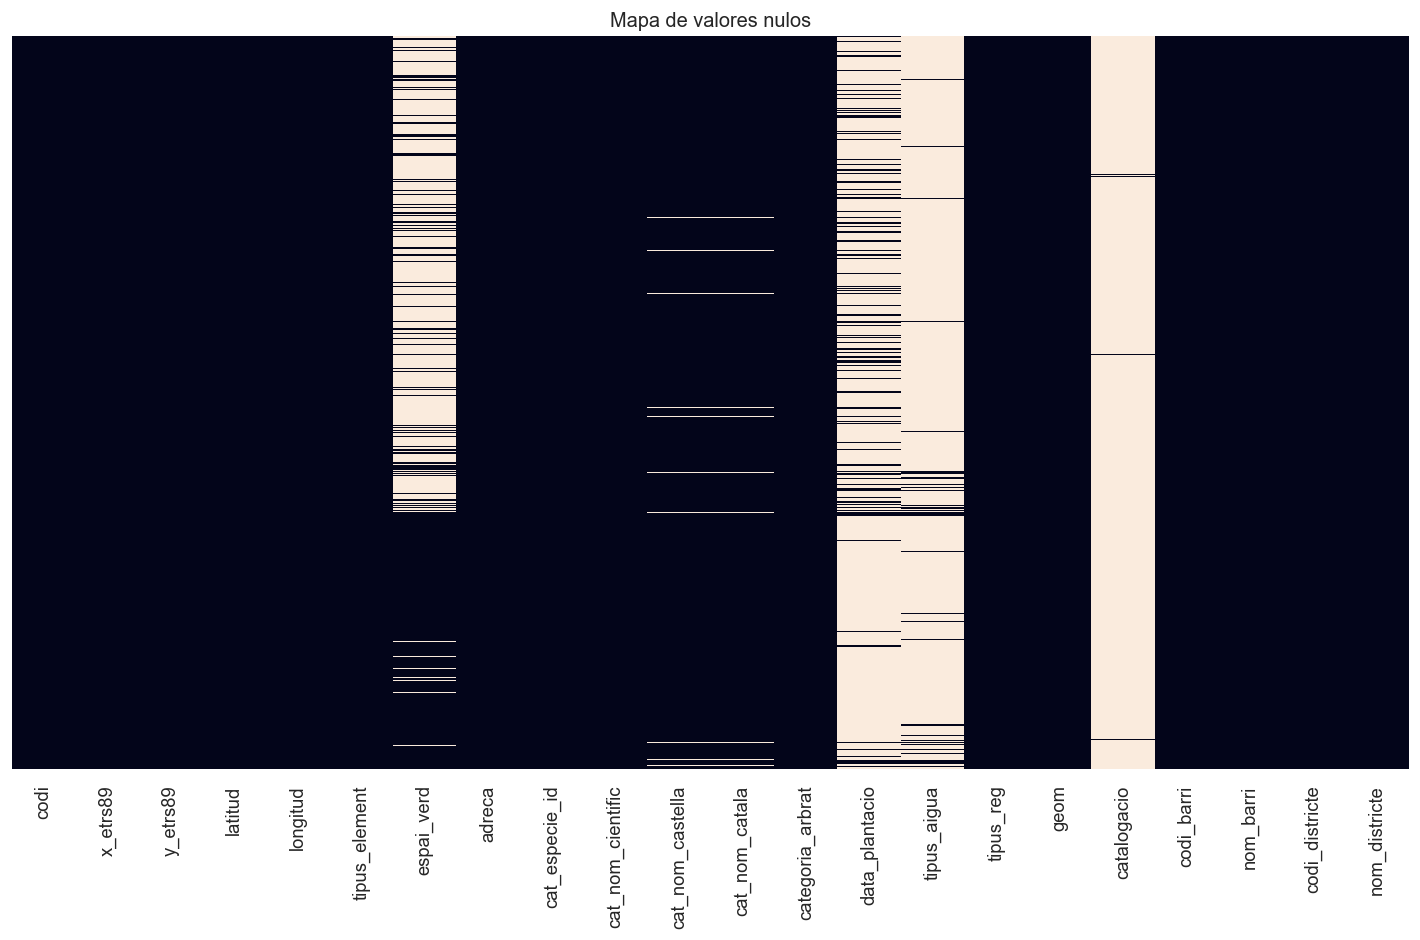

codi                      0
x_etrs89                  0
y_etrs89                  0
latitud                   0
longitud                  0
tipus_element             0
espai_verd           118449
adreca                    0
cat_especie_id            0
cat_nom_cientific         0
cat_nom_castella       3932
cat_nom_catala         4245
categoria_arbrat         64
data_plantacio       189661
tipus_aigua          213847
tipus_reg                25
geom                      0
catalogacio          223025
codi_barri               15
nom_barri                15
codi_districte            5
nom_districte             5
dtype: int64


In [187]:
# Visualización de valores nulos
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Mapa de valores nulos')
plt.tight_layout()
plt.show()

print(df.isnull().sum())

### 4.2 Tratamiento de nulos en espai_verd

In [272]:
print(f"Nulos iniciales en espai_verd:{df.espai_verd.isna().sum()} de {len(df)} ({df.espai_verd.isna().mean()*100:.1f}%)")


Nulos iniciales en espai_verd:118449 de 224171 (52.8%)


In [273]:
# Visualizar los primeros 10 valores únicos de la columna 'espai_verd'
print("Primeros 10 valores únicos en 'espai_verd':")
print(df.espai_verd.unique()[:10])

#Visualizar valores unicos y el conteo de la columna 'espai_verd' ordenados por frecuencia
print("\nConteo de valores únicos en 'espai_verd' ordenados por frecuencia:")
espai_verd_counts = df.espai_verd.value_counts()
espai_verd_counts = espai_verd_counts[espai_verd_counts > 0]
espai_verd_counts = espai_verd_counts.sort_values(ascending=False)
print(espai_verd_counts)


Primeros 10 valores únicos en 'espai_verd':
['Central de Nou Barris, Parc'
 'Valldaura, Pg. (Llucmajor, Pl. - Fabra i Puig, Pl.)'
 'Constància, Jardins ' '30 (Llull, c. (Diagonal, Av. - Prim, Rbla.))'
 'Aragó, c. - Enamorats, c. - Dos de Maig, c.'
 "Roma, Av. (Vikladomat, c. - Comte d'Urgell, c.)"
 'Aragó, c. - Enamorats, c. - Castillejos, c.'
 'Reis Catòlics davant,  17, c. (Associació Veïns Vallvidrera)'
 'General Mitre, Rda.' 'Doctor Fleming, c. -General Mitre, Rda.']

Conteo de valores únicos en 'espai_verd' ordenados por frecuencia:
espai_verd
Güell, ParK                                                     2586
Laberint d'Horta Parc                                           1828
Turó de la Peira, Parc.                                         1567
Ciutadella, Parc                                                1386
Esportiu Can Dragó, Parc                                        1201
                                                                ... 
Pierola, c. - Pujalt, c.       

Como parece que espai_verd se refiere a plazas o espacios con un conjunto de árboles, primero miramos de rellenar algunos nulos en base a direcciones que coincidan. Es decir, si la columna "adreça" tiene un árbol en la dirección X que corresponde al espai verd Y, si hay otro árbol en esa misma dirección, debe corresponder al mismo espacio verde. 

In [274]:
# Rellenar los valores nulos en 'espai_verd' basándose en coincidencias en la columna 'adreca'
df['espai_verd'] = df.groupby('adreca')['espai_verd'].transform(lambda x: x.ffill().bfill())

print(f"Nulos en espai_verd después de rellenar con las coincidencias por dirección: {df.espai_verd.isna().sum()} de {len(df)} ({df.espai_verd.isna().mean()*100:.1f}%)")

Nulos en espai_verd después de rellenar con las coincidencias por dirección: 97050 de 224171 (43.3%)


In [275]:
# Visualizar los primeros 10 valores únicos de la columna 'espai_verd'
print("Primeros 10 valores únicos en 'espai_verd':")
print(df.espai_verd.unique()[:10])

#Visualizar valores unicos y el conteo de la columna 'espai_verd' ordenados por frecuencia
print("\nConteo de valores únicos en 'espai_verd' ordenados por frecuencia:")
espai_verd_counts = df.espai_verd.value_counts()
espai_verd_counts = espai_verd_counts[espai_verd_counts > 0]
espai_verd_counts = espai_verd_counts.sort_values(ascending=False)
print(espai_verd_counts)

Primeros 10 valores únicos en 'espai_verd':
['Central de Nou Barris, Parc'
 'Valldaura, Pg. (Llucmajor, Pl. - Fabra i Puig, Pl.)'
 'Constància, Jardins ' '30 (Llull, c. (Diagonal, Av. - Prim, Rbla.))'
 'Aragó, c. - Enamorats, c. - Dos de Maig, c.'
 "Roma, Av. (Vikladomat, c. - Comte d'Urgell, c.)"
 'Aragó, c. - Enamorats, c. - Castillejos, c.'
 'Reis Catòlics davant,  17, c. (Associació Veïns Vallvidrera)'
 'General Mitre, Rda.' 'Doctor Fleming, c. -General Mitre, Rda.']

Conteo de valores únicos en 'espai_verd' ordenados por frecuencia:
espai_verd
Güell, ParK                                           2591
Laberint d'Horta Parc                                 1830
Turó de la Peira, Parc.                               1581
Ciutadella, Parc                                      1388
Poblenou, Parc                                        1248
                                                      ... 
Can Ensenya, c. (Fabra i Puig, Pg. 437( interior))       1
Font-rúbia, c. - Santuari, c.   

Finalmente, consideramos que los restantes se refieren a que no forman parte de ninguno de estos espacios, por lo que son árboles sueltos en la via pública u otros, y le damos el valor de "cap" (ninguno), para dejar el campo sin nulos.

In [276]:
df['espai_verd'].fillna('Cap', inplace=True)
print(f"Nulos finales en espai_verd: {df.espai_verd.isna().sum()} de {len(df)} ({df.espai_verd.isna().mean()*100:.1f}%)")

Nulos finales en espai_verd: 0 de 224171 (0.0%)


In [277]:
# Crear una nueva columna 'es_espai_verd' que indique si el árbol pertenece a un espacio verde
df['es_espai_verd'] = df['espai_verd'].apply(lambda x: False if x == "Cap" else True)

In [278]:
df.head(20)

,codi,x_etrs89,y_etrs89,latitud,longitud,tipus_element,espai_verd,adreca,cat_especie_id,cat_nom_cientific,...,data_plantacio,tipus_aigua,tipus_reg,geom,catalogacio,codi_barri,nom_barri,codi_districte,nom_districte,es_espai_verd
0,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',...,2022-02-15,NaN,GOTEIG AVARIAT,POINT (430270.561661092 4587637.99844993),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS,True
1,0000028AR,430278.453,4587643.703,41.437339,2.165447,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',...,2022-02-15,NaN,GOTEIG AVARIAT,POINT (430278.452565526 4587643.70285161),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS,True
2,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,NaN,NaN,SENSE INFORMAR,POINT (430035.238676006 4587693.83631125),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ,True
3,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,NaN,NaN,SENSE INFORMAR,POINT (430032.831137134 4587696.00500337),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ,True
4,0000388AR,430030.367,4587698.393,41.437810,2.162471,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,NaN,NaN,SENSE INFORMAR,POINT (430030.366746935 4587698.39336605),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ,True
5,0000423AR,430250.886,4587703.209,41.437872,2.165110,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 423",108,Pinus pinea,...,NaN,NaN,GOTEIG,POINT (430250.886125371 4587703.20870032),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS,True
6,0000692AR,430783.470,4587491.937,41.436015,2.171508,PALMERA VIARI,"Central de Nou Barris, Parc","C\ Doctor Pi i Molist, 117",47,Phoenix canariensis,...,NaN,NaN,ASPERSIÓ,POINT (430783.470348079 4587491.93733177),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS,True
7,0001110AR,430198.143,4587545.750,41.436449,2.164497,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 438",2336,Fraxinus angustifolia 'Raywood',...,2019-10-31,NaN,GOTEIG AVARIAT,POINT (430198.143308265 4587545.7497126),NaN,47.0,CAN PEGUERA,8.0,NOU BARRIS,True
8,0001111AR,430199.000,4587548.000,41.436470,2.164507,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",152,Populus nigra 'Italica',...,2008-01-01,NaN,GOTEIG AVARIAT,POINT (430198.99999995 4587547.99999993),NaN,47.0,CAN PEGUERA,8.0,NOU BARRIS,True
9,0001112AR,430200.421,4587550.877,41.436496,2.164523,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',...,2022-02-28,NaN,GOTEIG AVARIAT,POINT (430200.420891308 4587550.87684705),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS,True


In [279]:
df['es_espai_verd'].unique()

array([ True, False])

### 4.3 Tratamiento de nulos en nombres de especies (cat_nom_catala y cat_nom_castella)

In [280]:
# Visualizar los primeros 10 valores únicos de la columna 'cat_nom_catala'
print("Primeros 10 valores únicos en 'cat_nom_catala':")
print(df.cat_nom_catala.unique()[:10])
# Detectamos los valores únicos en 'cat_nom_catala' y vemos que hay algunos que no son válidos ("-")

Primeros 10 valores únicos en 'cat_nom_catala':
['-' 'Plàtan' 'Pi pinyoner; pi pinyer'
 'Palmera de Canaries; palmera de Canàries' 'Pollancre gavatx' nan
 'Pi blanc' 'server' 'Tipuana' 'Acàcia del Japó']


In [281]:
# Vemos a qué 'cat_nom_cientific' corresponde el valor "-":

# Filtrar las filas donde cat_nom_catala es '-'
cat_nom_cientific_correspondiente = df[df['cat_nom_catala'] == '-']['cat_nom_cientific'].unique()

# Mostrar los valores únicos de cat_nom_cientific
print("cat_nom_cientific correspondiente a '-':", cat_nom_cientific_correspondiente)

cat_nom_cientific correspondiente a '-': ["Fraxinus angustifolia 'Raywood'" "Magnolia grandiflora 'Gallisoniensis'"
 "Pyrus calleryana 'Chanticleer'" "Morus alba 'Fruitless'"
 "Quercus robur 'Fastigiata'" "Robinia pseudoacacia 'Pyramidalis'"
 "Styphnolobium japonicum 'Columnare'" "Ligustrum japonicum 'Texanum'"
 "Cupressus sempervirens 'stricta'" "Ulmus minor 'Umbraculifera'"
 "Robinia pseudoacacia 'Umbraculifera'" "Prunus cerasifera 'Nigra'"
 "Hesperocyparis macrocarpa 'Compacta'" "Ligustrum japonicum 'Variegatum'"
 "Morus alba 'Multicaulis'" "Laurus nobilis 'Crispa'"
 "Malus x moerlandsii 'Liset'" "Ligustrum lucidum 'Aureovariegatum'"
 'Ficus rubiginosa f. glabrescens' "Picea × albertiana 'Conica'"
 "Ficus elastica 'Decora Rubra'" 'Brachychiton populneus subsp. trilobus'
 "Ficus binnendykii 'Alii'" "Robinia pseudoacacia 'Microphylla'"
 "Malus x zumi 'Golden Hornet'"]


In [282]:
# Contar valores nulos en 'cat_nom_catala'
nulos_cat_nom_catala = df['cat_nom_catala'].isna().sum()
print(f"Valores nulos en cat_nom_catala: {nulos_cat_nom_catala}")

# Contar valores iguales a '-'
valores_guion = (df['cat_nom_catala'] == '-').sum()
print(f"Valores '-' en cat_nom_catala: {valores_guion}")

Valores nulos en cat_nom_catala: 4245
Valores '-' en cat_nom_catala: 5577


In [283]:
# Reemplazar los valores "-" en 'cat_nom_catala' por NaN
df['cat_nom_catala'].replace('-', np.nan, inplace=True)

# Rellenar los valores nulos en 'cat_nom_catala' basándose en coincidencias en la columna 'cat_nom_cientific'
df['cat_nom_catala'] = df.groupby('cat_nom_cientific')['cat_nom_catala'].transform(lambda x: x.ffill().bfill())

print(f"No hay nombre en catalán en {df.cat_nom_catala.isna().sum()} de {len(df)} registros ({df.cat_nom_catala.isna().mean()*100:.1f}%)")

No hay nombre en catalán en 9822 de 224171 registros (4.4%)


Pasamos a los nombres en castellano:

In [284]:
print(f"Nulos iniciales en cat_nom_castella: {df.cat_nom_castella.isna().sum()} de {len(df)}")
print(f"Valores '-' en cat_nom_castella: {(df.cat_nom_castella == '-').sum()} de {len(df)}")

Nulos iniciales en cat_nom_castella: 3932 de 224171
Valores '-' en cat_nom_castella: 5577 de 224171


In [285]:
# Cambiar también los valores "-" a NaN en cat_nom_castella
df['cat_nom_castella'].replace('-', np.nan, inplace=True)


In [286]:
# Rellenar los valores nulos en 'cat_nom_castella' basándose en coincidencias en la columna 'cat_nom_cientific'
df['cat_nom_castella'] = df.groupby('cat_nom_cientific')['cat_nom_castella'].transform(lambda x: x.ffill().bfill())

print(f"No hay nombre en castellano en {df.cat_nom_castella.isna().sum()} de {len(df)} registros")

No hay nombre en castellano en 9509 de 224171 registros


Rellenamos los valores nulos restantes de los nombres en castellano y catalán con su nombre científico:

In [287]:
# Rellenar valores nulos en 'cat_nom_catala' con 'cat_nom_cientific'
df['cat_nom_catala'] = df['cat_nom_catala'].fillna(df['cat_nom_cientific'])

# Rellenar valores nulos en 'cat_nom_castella' con 'cat_nom_cientific'
df['cat_nom_castella'] = df['cat_nom_castella'].fillna(df['cat_nom_cientific'])

# Verificar los nulos restantes
print(f"Nulos finales en cat_nom_catala: {df['cat_nom_catala'].isna().sum()} de {len(df)}")
print(f"Nulos finales en cat_nom_castella: {df['cat_nom_castella'].isna().sum()} de {len(df)}")

Nulos finales en cat_nom_catala: 0 de 224171
Nulos finales en cat_nom_castella: 0 de 224171


### 4.4. Tratamiento de nulos en categoria_arbrat

In [288]:
# Visualizar los 10 primeros valores únicos de 'categoria_arbrat'
print("Primeros 10 valores únicos en 'categoria_arbrat':")
print(df.categoria_arbrat.unique()[:10])

Primeros 10 valores únicos en 'categoria_arbrat':
['PRIMERA' 'SEGONA' 'EXEMPLAR' 'TERCERA' nan]


In [289]:
# Sustituir los valores nulos en 'categoria_arbrat' según la columna 'cat_nom_cientific'
df['categoria_arbrat'] = df.groupby('cat_nom_cientific')['categoria_arbrat'].transform(lambda x: x.ffill().bfill())
print(f"Nulos finales en categoria_arbrat: {df.categoria_arbrat.isna().sum()} de {len(df)}")

Nulos finales en categoria_arbrat: 3 de 224171


In [290]:
# Para los tres nulos que no tienen categoria, los sustituimos por la modalidad más frecuente
df['categoria_arbrat'].fillna(df['categoria_arbrat'].mode()[0], inplace=True)

# Verificamos los nulos restantes
print(f"Nulos finales en categoria_arbrat: {df.categoria_arbrat.isna().sum()} de {len(df)}")

Nulos finales en categoria_arbrat: 0 de 224171


### 4.5 Tratamiento de nulos en data_plantacio

In [291]:
# Paso 1: Intentar convertir las fechas sin especificar el formato
df['data_plantacio'] = pd.to_datetime(df['data_plantacio'], errors='coerce')

# Paso 2: Verificar cuántas fechas se pudieron convertir
fechas_validas = df['data_plantacio'].notna().sum()
print(f"Fechas válidas convertidas: {fechas_validas} de {len(df)}")

# Paso 3: Inspeccionar las fechas no convertidas
fechas_invalidas = df[df['data_plantacio'].isna()]['data_plantacio']

# Paso 4: Crear una columna explícita que indique si la fecha es conocida
df['data_coneguda'] = ~df['data_plantacio'].isna()

# Para análisis descriptivos
print(f"Árboles con fecha conocida: {df['data_coneguda'].sum()} de {len(df)} ({df['data_coneguda'].mean()*100:.1f}%)")

# Número y porcentaje de nulos en 'data_plantacio'
nulos_data_plantacio = df['data_plantacio'].isna().sum()
print(f"Nulos en 'data_plantacio': {nulos_data_plantacio} de {len(df)} ({df['data_plantacio'].isna().mean()*100:.1f}%)")

Fechas válidas convertidas: 34501 de 224171
Árboles con fecha conocida: 34501 de 224171 (15.4%)
Nulos en 'data_plantacio': 189670 de 224171 (84.6%)


In [292]:
# Decidimos dejar los nulos como están, ya que no se pueden rellenar de manera confiable, pero hemos creado una columna que indica si la fecha es conocida o no.
df.head()

,codi,x_etrs89,y_etrs89,latitud,longitud,tipus_element,espai_verd,adreca,cat_especie_id,cat_nom_cientific,...,tipus_aigua,tipus_reg,geom,catalogacio,codi_barri,nom_barri,codi_districte,nom_districte,es_espai_verd,data_coneguda
0,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',...,NaN,GOTEIG AVARIAT,POINT (430270.561661092 4587637.99844993),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS,True,True
1,0000028AR,430278.453,4587643.703,41.437339,2.165447,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',...,NaN,GOTEIG AVARIAT,POINT (430278.452565526 4587643.70285161),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS,True,True
2,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,NaN,SENSE INFORMAR,POINT (430035.238676006 4587693.83631125),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ,True,False
3,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,NaN,SENSE INFORMAR,POINT (430032.831137134 4587696.00500337),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ,True,False
4,0000388AR,430030.367,4587698.393,41.437810,2.162471,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,NaN,SENSE INFORMAR,POINT (430030.366746935 4587698.39336605),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ,True,False


### 4.6 Tratamiento de nulos en tipus_aigua y tipus_reg

In [293]:
# Identificar el valor más frecuente de 'tipus_aigua' para cada 'cat_especie_id'
main_tipus_aigua = df.groupby('cat_especie_id')['tipus_aigua'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Rellenar los valores nulos en 'tipus_aigua' utilizando el valor más frecuente por 'cat_especie_id'
df['tipus_aigua'] = df.apply(
    lambda row: main_tipus_aigua[row['cat_especie_id']] if pd.isna(row['tipus_aigua']) else row['tipus_aigua'], axis=1
)

# Verificar los nulos restantes en 'tipus_aigua'
print(f"Nulos restantes en 'tipus_aigua': {df['tipus_aigua'].isna().sum()}")
print(f"Valores únicos en 'tipus_aigua': {df['tipus_aigua'].unique()}")

Nulos restantes en 'tipus_aigua': 3511
Valores únicos en 'tipus_aigua': ['FREÀTICA' 'POTABLE' None 'REGENERADA']


Primero, para los que no sabíamos qué tipo de agua se utiliza para regarlos, hemos cogido el tipo de agua que se utiliza mayoritariamente para ese tipo de planta.
A continuación, para los nulos restantes, cogeremos el tipo de agua más común para el tipo de riego usado en ese caso.  

In [294]:
# Identificar el valor más frecuente de 'tipus_aigua' para cada 'tipus_reg'
main_tipus_aigua = df.groupby('tipus_reg')['tipus_aigua'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Rellenar los valores nulos en 'tipus_aigua' utilizando el valor más frecuente por 'tipus_reg'
df['tipus_aigua'] = df.apply(
    lambda row: main_tipus_aigua[row['tipus_reg']] if pd.isna(row['tipus_aigua']) else row['tipus_aigua'], axis=1
)

# Verificar los nulos restantes en 'tipus_aigua'
print(f"Nulos restantes en 'tipus_aigua': {df['tipus_aigua'].isna().sum()}")
print(f"Valores únicos en 'tipus_aigua': {df['tipus_aigua'].unique()}")

# Visualizar la filas con valores nulos en 'tipus_aigua'
print("Filas con valores nulos en 'tipus_aigua':")
print(df[df['tipus_aigua'].isna()])

Nulos restantes en 'tipus_aigua': 1
Valores únicos en 'tipus_aigua': ['FREÀTICA' 'POTABLE' 'REGENERADA' None]
Filas con valores nulos en 'tipus_aigua':
             codi    x_etrs89     y_etrs89    latitud  longitud tipus_element  \
164633  0196505AR  425986.831  4583832.455  41.402628  2.114549    ARBRE PARC   

                  espai_verd                 adreca  cat_especie_id  \
164633  Can Sentmenat, Jardí  Jard Can Sentmenat, 0         5029185   

            cat_nom_cientific  ... tipus_aigua              tipus_reg  \
164633  Photinia serratifolia  ...        None  GOTEIG TANCAT SEQUERA   

                                             geom    catalogacio codi_barri  \
164633  POINT (425986.831071261 4583832.45473363)  INTERÈS LOCAL       23.0   

       nom_barri codi_districte          nom_districte  es_espai_verd  \
164633    SARRIÀ            5.0  SARRIÀ - SANT GERVASI           True   

       data_coneguda  
164633         False  

[1 rows x 24 columns]


In [295]:
# Es posible que se deba a que el goteo está cerrado, por lo que no recibe agua en el momento de la recogida de datos.
# Como se trata de un campo categórico, podemos rellenar los nulos con la categoría más frecuente
df['tipus_aigua'].fillna(df['tipus_aigua'].mode()[0], inplace=True)

#Comprobamos que no haya nulos
print(f"Nulos restantes en 'tipus_aigua': {df['tipus_aigua'].isna().sum()} de {len(df)} ({df['tipus_aigua'].isna().mean()*100:.1f}%)")

Nulos restantes en 'tipus_aigua': 0 de 224171 (0.0%)


In [296]:
# Visualizar los valores únicos de 'tipus_reg'
print("Valores únicos en 'tipus_reg':")
df['tipus_reg'].unique().tolist()

Valores únicos en 'tipus_reg':


['GOTEIG AVARIAT',
 'SENSE INFORMAR',
 'GOTEIG',
 'ASPERSIÓ',
 'DIFUSIÓ',
 'MÀNEGA',
 nan,
 'ROTATOR',
 'GOTEIG TANCAT SEQUERA',
 'HIDROJARDINERA']

In [297]:
# Comprobar si hay valores nulos en 'tipus_reg' 
print(f"Nulos en 'tipus_reg': {df['tipus_reg'].isna().sum()} de {len(df)} ({df['tipus_reg'].isna().mean()*100:.1f}%)")

Nulos en 'tipus_reg': 25 de 224171 (0.0%)


In [298]:
# Rellenar los valores nulos en 'tipus_reg' utilizando el valor más frecuente por 'cat_especie_id'
main_tipus_reg = df.groupby('cat_especie_id')['tipus_reg'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

df['tipus_reg'] = df.apply(
    lambda row: main_tipus_reg[row['cat_especie_id']] if pd.isna(row['tipus_reg']) else row['tipus_reg'], axis=1
)

# Verificar los nulos restantes en 'tipus_reg'
print(f"Nulos restantes en 'tipus_reg': {df['tipus_reg'].isna().sum()} de {len(df)} ({df['tipus_reg'].isna().mean()*100:.1f}%)")

Nulos restantes en 'tipus_reg': 0 de 224171 (0.0%)


### 4.7 Tratamiento de nulos en catalogacio

In [299]:
df.catalogacio.unique()


array([nan, 'INTERÈS LOCAL'], dtype=object)

In [300]:
# Convertir 'catalogacio' a booleano y renombrar la columna
df['interes_local'] = df['catalogacio'].apply(lambda x: True if x == "INTERÈS LOCAL" else False)

# Verificar los cambios
print(df['interes_local'].value_counts())

interes_local
False    223025
True       1146
Name: count, dtype: int64


In [301]:
# Eliminar la columna original 'catalogacio'
df.drop(columns=['catalogacio'], inplace=True)

### 4.8 Tratamiento de nulos en información geográfica (barri y districte)

In [302]:
# Contar los nulos en 'codi_barri' y 'nom_barri'
print(f"Nulos en 'codi_barri': {df['codi_barri'].isna().sum()} de {len(df)} ({df['codi_barri'].isna().mean()*100:.1f}%)")
print(f"Nulos en 'nom_barri': {df['nom_barri'].isna().sum()} de {len(df)} ({df['nom_barri'].isna().mean()*100:.1f}%)")

Nulos en 'codi_barri': 15 de 224171 (0.0%)
Nulos en 'nom_barri': 15 de 224171 (0.0%)


In [303]:
# Sustituir los nulos en 'codi_barri' en base a adreca
df['codi_barri'] = df.groupby('adreca')['codi_barri'].transform(lambda x: x.ffill().bfill())

# Sustituir los nulos en 'nom_barri' en base a adreca
df['nom_barri'] = df.groupby('adreca')['nom_barri'].transform(lambda x: x.ffill().bfill())

# Comprobar los nulos restantes
print(f"Nulos restantes en 'codi_barri': {df['codi_barri'].isna().sum()} de {len(df)} ({df['codi_barri'].isna().mean()*100:.1f}%)")
print(f"Nulos restantes en 'nom_barri': {df['nom_barri'].isna().sum()} de {len(df)} ({df['nom_barri'].isna().mean()*100:.1f}%)")

Nulos restantes en 'codi_barri': 2 de 224171 (0.0%)
Nulos restantes en 'nom_barri': 2 de 224171 (0.0%)


In [304]:
# Visualizar los registros con valores nulos en 'codi_barri' y 'nom_barri'
print("Registros con valores nulos en 'codi_barri' y 'nom_barri':")
print(df[(df['codi_barri'].isna()) & (df['nom_barri'].isna())])

Registros con valores nulos en 'codi_barri' y 'nom_barri':
             codi    x_etrs89     y_etrs89   latitud  longitud tipus_element  \
143254  0322677AR  427563.834  4578258.529  41.35257  2.134079   ARBRE VIARI   
143255  0322678AR  427563.834  4578258.529  41.35257  2.134079   ARBRE VIARI   

       espai_verd               adreca  cat_especie_id     cat_nom_cientific  \
143254        Cap  C\ Metal·lúrgia, 44             285  Robinia pseudoacacia   
143255        Cap  C\ Metal·lúrgia, 44             285  Robinia pseudoacacia   

        ... tipus_aigua       tipus_reg  \
143254  ...     POTABLE  SENSE INFORMAR   
143255  ...     POTABLE  SENSE INFORMAR   

                                             geom codi_barri nom_barri  \
143254  POINT (427563.834465078 4578258.52931539)        NaN       NaN   
143255  POINT (427563.834465078 4578258.52931539)        NaN       NaN   

       codi_districte     nom_districte  es_espai_verd data_coneguda  \
143254            3.0  SANTS - MON

In [305]:
# Añadimos manualmente los valores que faltan, sabiendo nosotros que la dirección es del barrio de La Marina del Prat Vermell
# Primero, buscamos como está escrito el barrio, mostrando los valores únicos 
print("Valores únicos en 'nom_barri':")
print(df['nom_barri'].unique())

Valores únicos en 'nom_barri':
['LA GUINEUETA' 'HORTA' 'CAN PEGUERA' 'EL BESÒS I EL MARESME'
 'LA SAGRADA FAMILIA' 'LA NOVA ESQUERRA DE LEIXAMPLE'
 'VALLVIDRERA, EL TIBIDABO I LES PLANES' 'LES TRES TORRES'
 'VILAPICINA I LA TORRE LLOBETA' 'LA SAGRERA'
 'DIAGONAL MAR I EL FRONT MARÍTIM DEL POBLENOU'
 'SANT PERE, SANTA CATERINA I LA RIBERA' 'PROVENÇALS DEL POBLENOU'
 'EL POBLENOU' 'SANT MARTÍ DE PROVENÇALS' 'LA VERNEDA I LA PAU'
 'EL PARC I LA LLACUNA DEL POBLENOU' 'EL CLOT' 'NAVAS' 'BARÓ DE VIVER'
 'LA TRINITAT VELLA' 'TORRE BARÓ' 'VALLBONA' 'LA PROSPERITAT' 'VERDUN'
 'LA TRINITAT NOVA' 'EL TURÓ DE LA PEIRA' 'SANT GENÍS DELS AGUDELLS'
 'MONTBAU' 'LA VALL DHEBRON' 'LA CLOTA' 'EL CARMEL' 'LA TEIXONERA'
 'CAN BARÓ' 'EL BAIX GUINARDÓ' 'LA SALUT' 'EL COLL'
 'SANT GERVASI - LA BONANOVA' 'SANT GERVASI - GALVANY' 'SARRIÀ'
 'EL PUTXET I EL FARRÓ' 'LA MATERNITAT I SANT RAMON' 'LES CORTS'
 'LA MARINA DEL PRAT VERMELL' 'EL POBLE SEC' 'LA MARINA DEL PORT'
 'LA FONT DE LA GUATLLA' 'SANT ANTONI' 'LA D

In [306]:
df['nom_barri'].fillna('LA MARINA DEL PRAT VERMELL', inplace=True)

In [307]:
# Comprobamos que no haya nulos
print(f"Nulos restantes en 'nom_barri': {df['nom_barri'].isna().sum()} de {len(df)} ({df['nom_barri'].isna().mean()*100:.1f}%)")

# Eliminamos la columna 'codi_barri' ya que no es necesaria
df.drop(columns=['codi_barri'], inplace=True)

Nulos restantes en 'nom_barri': 0 de 224171 (0.0%)


In [308]:
# Contar los nulos en 'codi_districte' y 'nom_districte'
print(f"Nulos en 'codi_districte': {df['codi_districte'].isna().sum()} de {len(df)} ({df['codi_districte'].isna().mean()*100:.1f}%)")
print(f"Nulos en 'nom_districte': {df['nom_districte'].isna().sum()} de {len(df)} ({df['nom_districte'].isna().mean()*100:.1f}%)")

Nulos en 'codi_districte': 5 de 224171 (0.0%)
Nulos en 'nom_districte': 5 de 224171 (0.0%)


In [309]:
# Sustituir los nulos en 'nom_districte' en base a nom_barri
df['nom_districte'] = df.groupby('nom_barri')['nom_districte'].transform(lambda x: x.ffill().bfill())

In [310]:
# Comprobamos que no haya nulos en 'nom_districte'
print(f"Nulos restantes en 'nom_districte': {df['nom_districte'].isna().sum()} de {len(df)} ({df['nom_districte'].isna().mean()*100:.1f}%)")

# Eliminar la columna 'codi_districte' ya que no es necesaria
df.drop(columns=['codi_districte'], inplace=True)

Nulos restantes en 'nom_districte': 0 de 224171 (0.0%)


### 4.9 Verificación final de valores nulos

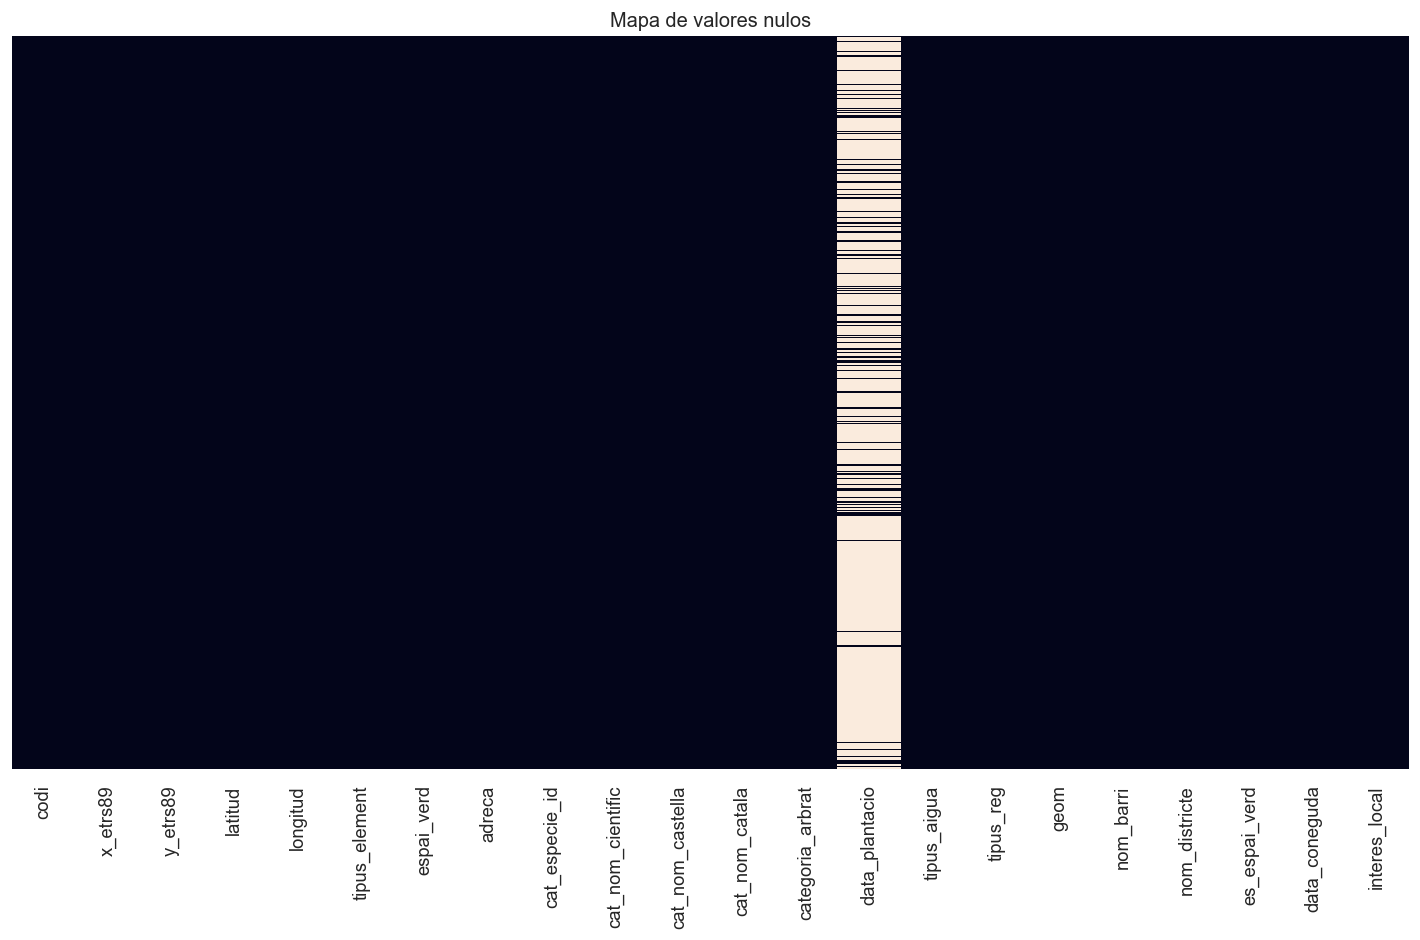

codi                      0
x_etrs89                  0
y_etrs89                  0
latitud                   0
longitud                  0
tipus_element             0
espai_verd                0
adreca                    0
cat_especie_id            0
cat_nom_cientific         0
cat_nom_castella          0
cat_nom_catala            0
categoria_arbrat          0
data_plantacio       189670
tipus_aigua               0
tipus_reg                 0
geom                      0
nom_barri                 0
nom_districte             0
es_espai_verd             0
data_coneguda             0
interes_local             0
dtype: int64


In [311]:
# Visualización de valores nulos
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Mapa de valores nulos')
plt.tight_layout()
plt.show()

print(df.isnull().sum())

### 4.10. Resumen de la limpieza de datos

In [312]:

"""
A lo largo del proceso de limpieza, además de tratar los valores nulos, 
se han realizado varias transformaciones importantes que enriquecen el dataset:

1. Conversión de tipos de datos:
   - Fechas convertidas a formato datetime para facilitar análisis temporales
   - Valores categóricos estandarizados para mejorar la consistencia

2. Creación de variables auxiliares:
   - 'es_espai_verd': Identifica árboles en espacios verdes catalogados vs. árboles en vía pública
   - 'data_coneguda': Señala árboles con fecha de plantación registrada
   - 'interes_local': Conversión de 'catalogacio' a variable booleana para identificar ejemplares protegidos

3. Simplificación de estructura:
   - Eliminación de columnas redundantes (catalogacio, codi_barri, codi_districte)
   - Priorización de nombres sobre códigos para facilitar interpretación

4. Homogeneización de datos:
   - Valores '-' convertidos a valores reales basados en otros campos
   - Estandarización de nombres de especies en catalán y castellano

Estas transformaciones, junto con la limpieza exhaustiva de valores nulos,
han preparado adecuadamente el dataset para su análisis visual y su posterior 
integración en un dashboard interactivo en Power BI.
"""

print("Dataset final después de limpieza y transformaciones:")
print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"Columnas: {df.columns.tolist()}")
print(f"Valores nulos restantes: {df.isnull().sum().sum()} (solo en data_plantacio: {df['data_plantacio'].isna().sum()})")

Dataset final después de limpieza y transformaciones:
Dimensiones: 224171 filas x 22 columnas
Columnas: ['codi', 'x_etrs89', 'y_etrs89', 'latitud', 'longitud', 'tipus_element', 'espai_verd', 'adreca', 'cat_especie_id', 'cat_nom_cientific', 'cat_nom_castella', 'cat_nom_catala', 'categoria_arbrat', 'data_plantacio', 'tipus_aigua', 'tipus_reg', 'geom', 'nom_barri', 'nom_districte', 'es_espai_verd', 'data_coneguda', 'interes_local']
Valores nulos restantes: 189670 (solo en data_plantacio: 189670)


In [313]:
# Crear la carpeta 'clean' si no existe
clean_folder = r'C:\Users\carlo\Documentos\proyectos\arbrat\data\clean'
os.makedirs(clean_folder, exist_ok=True)

# Exportar el DataFrame a archivos CSV
try:
    df.to_csv(os.path.join(clean_folder, 'arbres_clean.csv'), index=False, encoding='utf-8')
except PermissionError:
    print("El archivo ya existe o está siendo utilizado. Ignorando la operación.")

## 5. VISUALIZACIÓN EXPLORATORIA


In [314]:
"""
En esta sección creamos visualizaciones para explorar los patrones
y características principales del arbolado urbano de Barcelona.
"""

# Configuración de estilo para todas las visualizaciones
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 120
plt.rcParams['figure.figsize'] = (12, 7)
colors = plt.cm.viridis(np.linspace(0, 1, 10))


### 5.1 Distribución geográfica

In [315]:
# Crear la carpeta 'output' si no existe
output_folder = r'C:\Users\carlo\Documentos\proyectos\arbrat\output'
os.makedirs(output_folder, exist_ok=True)

#### 5.1.1 Mapa de densidad de árboles


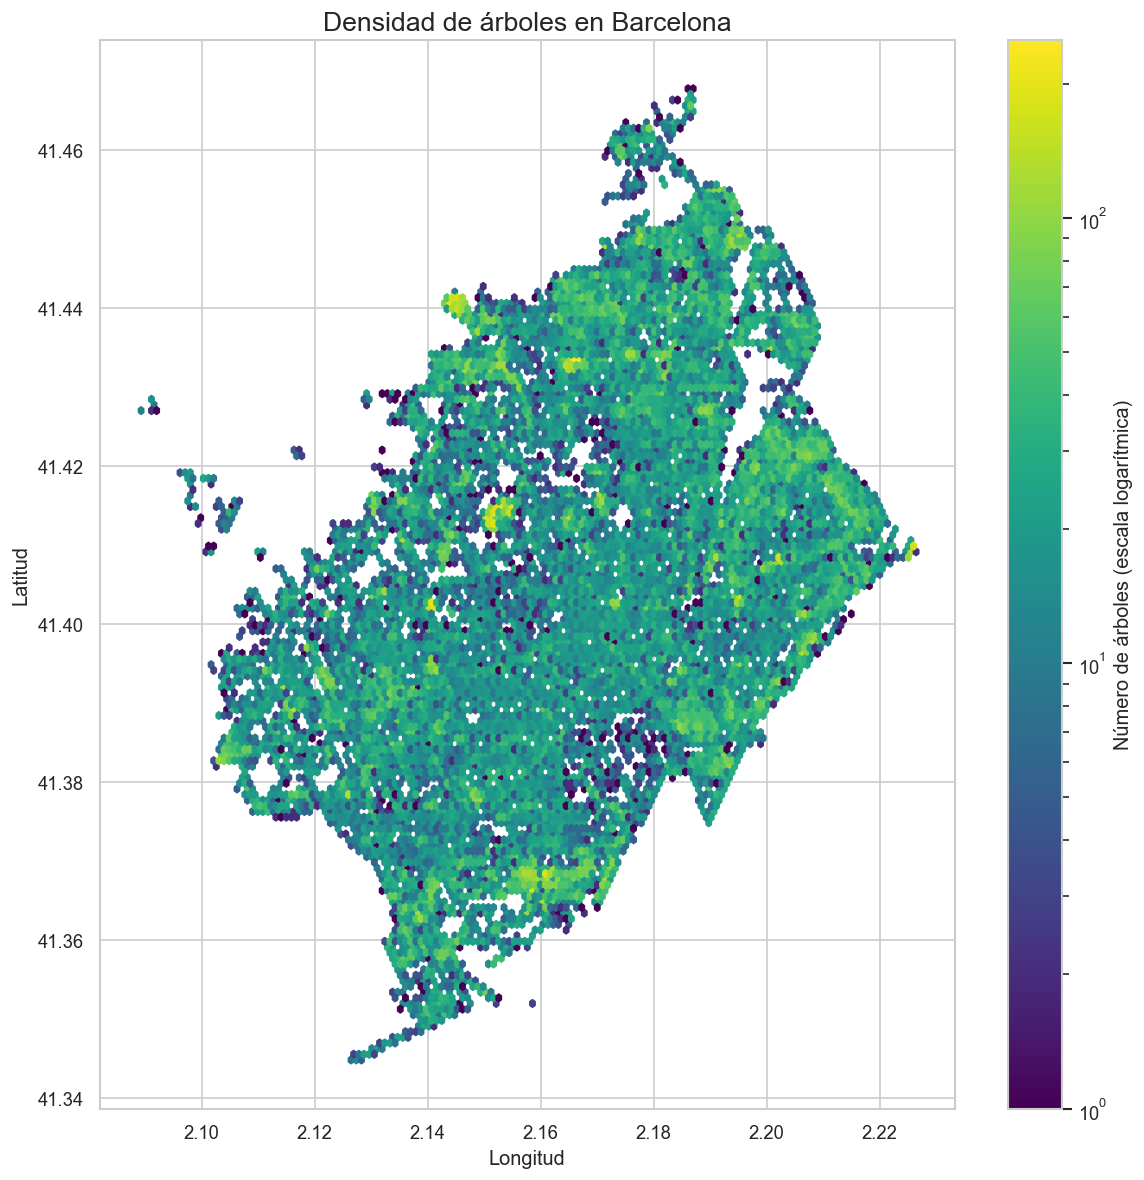

In [316]:
plt.figure(figsize=(10, 10))
plt.hexbin(df['longitud'], df['latitud'], gridsize=150, cmap='viridis', bins='log')
plt.colorbar(label='Número de árboles (escala logarítmica)')
plt.title('Densidad de árboles en Barcelona', fontsize=16)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'mapa_densidad.png'), dpi=300, bbox_inches='tight')
plt.show()

#### 5.1.2 Distribución por distrito


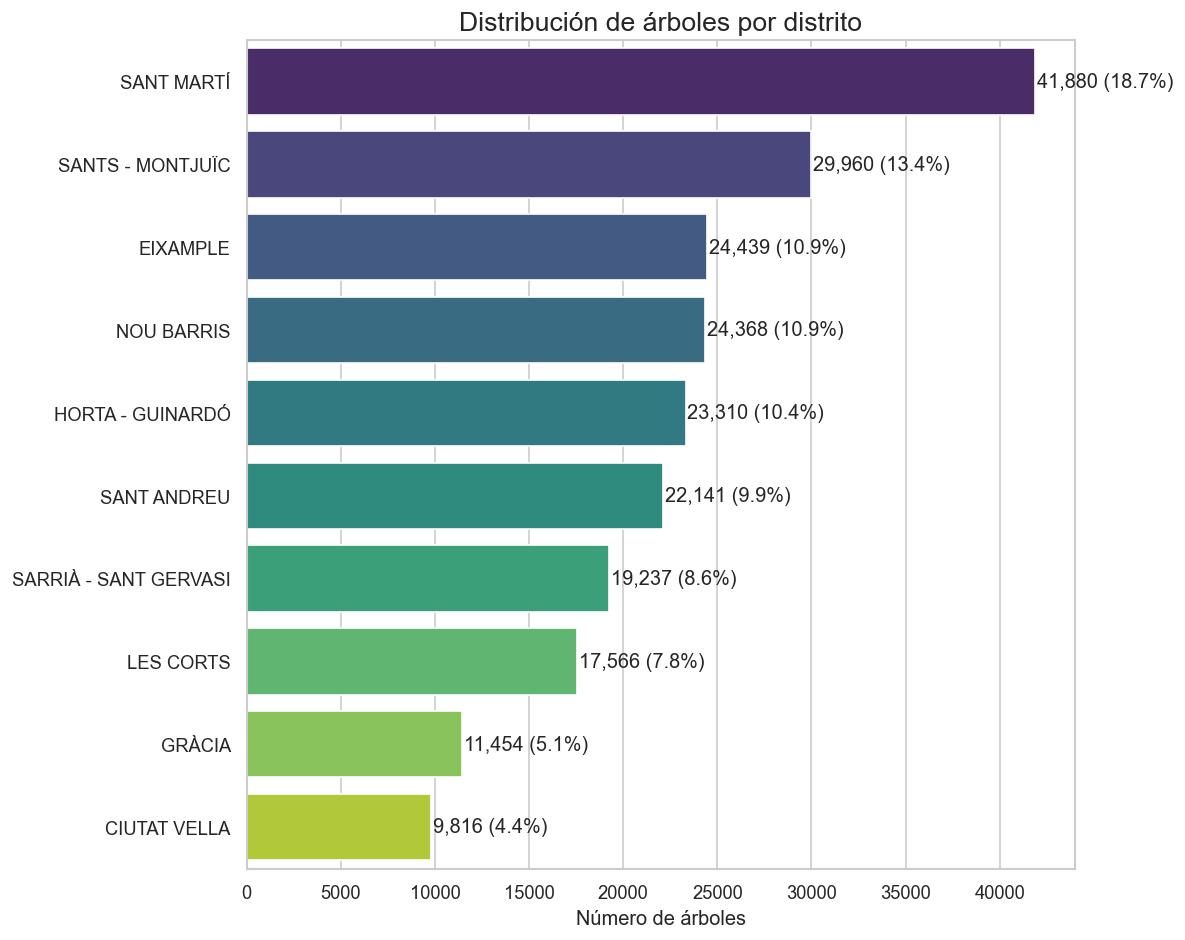

In [317]:
plt.figure(figsize=(10, 8))
distrito_counts = df['nom_districte'].value_counts()
ax = sns.barplot(x=distrito_counts.values, y=distrito_counts.index, palette='viridis')
# Añadir valores y porcentajes a las barras
for i, v in enumerate(distrito_counts.values):
    ax.text(v + 100, i, f"{v:,} ({v/len(df)*100:.1f}%)", va='center')

plt.title('Distribución de árboles por distrito', fontsize=16)
plt.xlabel('Número de árboles')
plt.ylabel('')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'arboles_por_distrito.png'), dpi=300, bbox_inches='tight')
plt.show()

### 5.2. Análisis por especies

#### 5.2.1. Top especies más comunes

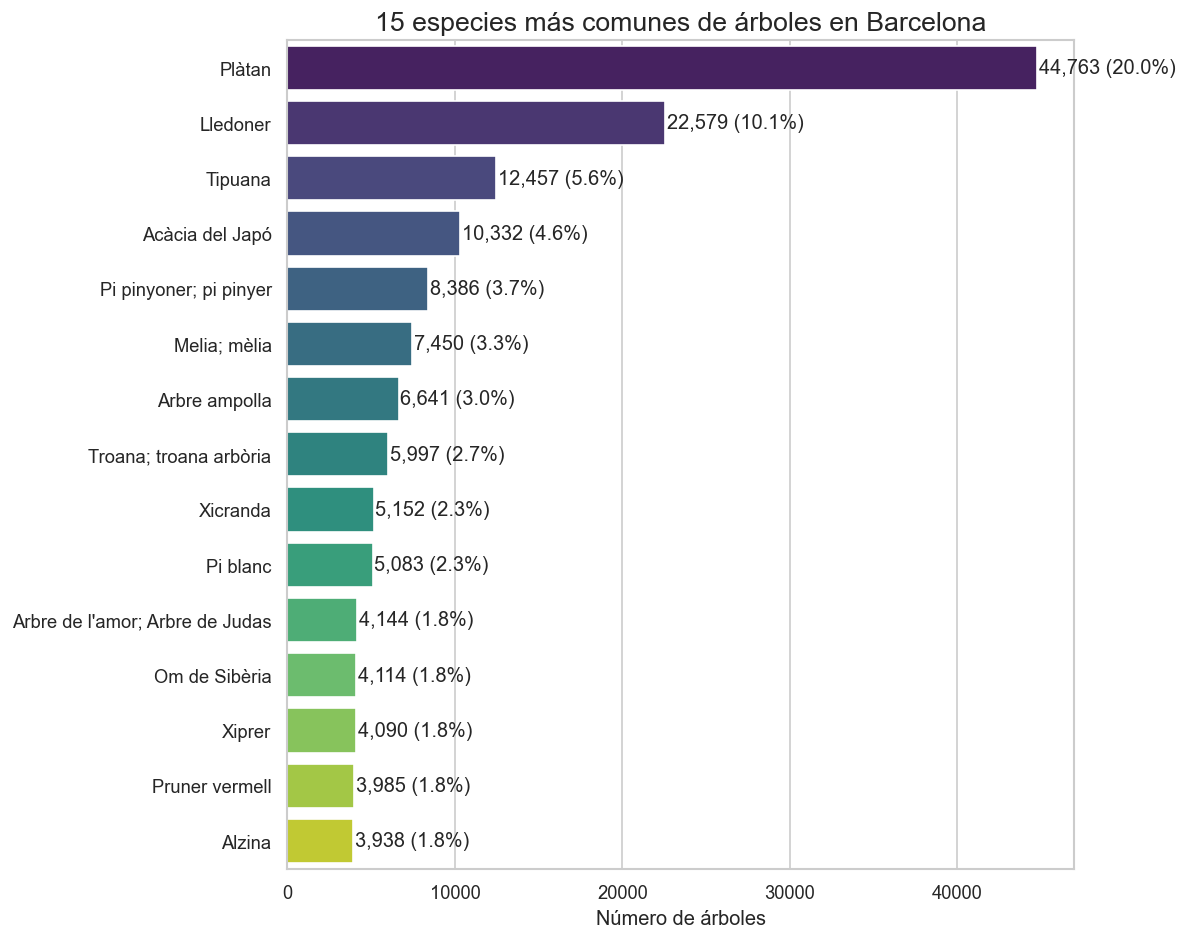

In [318]:
output_folder = r'C:\Users\carlo\Documentos\proyectos\arbrat\output'

# Crear la carpeta si no existe
import os
os.makedirs(output_folder, exist_ok=True)

top_especies = df['cat_nom_catala'].value_counts().nlargest(15)
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=top_especies.values, y=top_especies.index, palette='viridis')

# Añadir valores y porcentajes a las barras
for i, v in enumerate(top_especies.values):
    ax.text(v + 100, i, f"{v:,} ({v/len(df)*100:.1f}%)", va='center')

plt.title('15 especies más comunes de árboles en Barcelona', fontsize=16)
plt.xlabel('Número de árboles')
plt.ylabel('')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'top_15_especies.png'), dpi=300, bbox_inches='tight')
plt.show()


#### 5.2.2 Distribución de las 5 especies principales por distrito


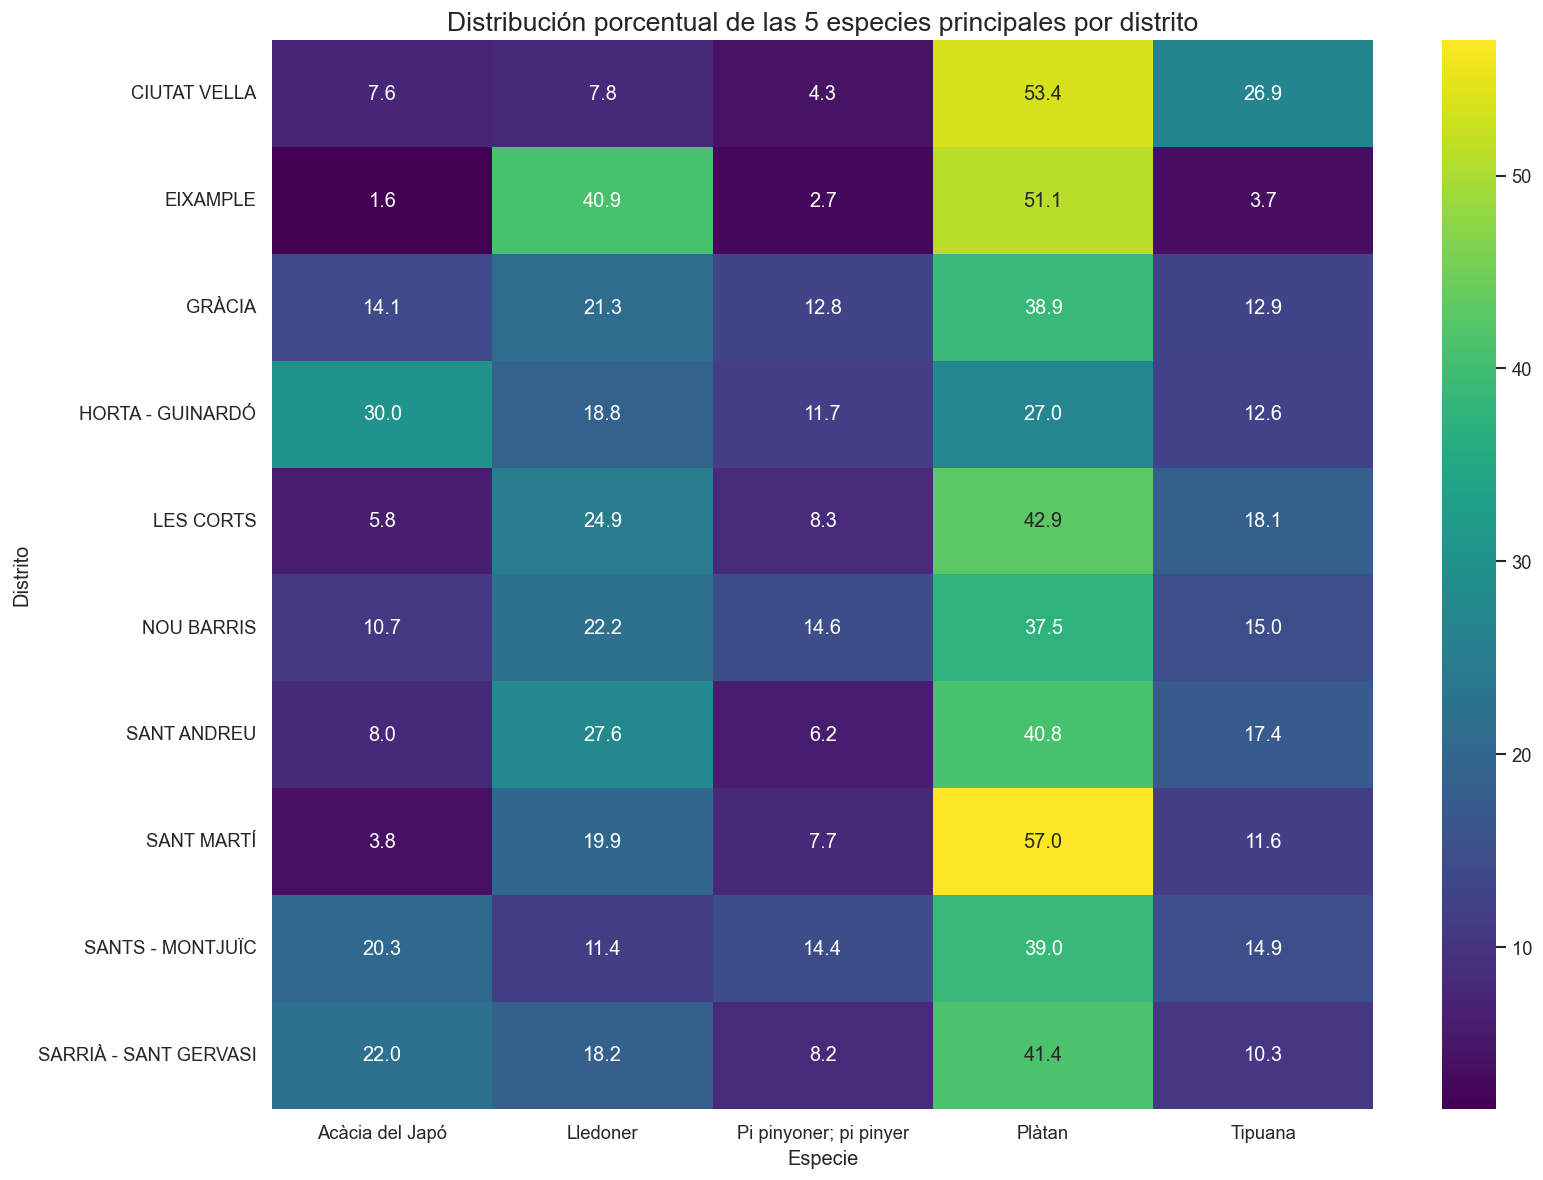

In [319]:
# Seleccionar las 5 especies más comunes
top5_especies = df['cat_nom_catala'].value_counts().nlargest(5).index.tolist()
df_top5 = df[df['cat_nom_catala'].isin(top5_especies)]

# Crear tabla cruzada
especies_por_distrito = pd.crosstab(df_top5['nom_districte'], df_top5['cat_nom_catala'])

# Convertir a porcentajes
especies_por_distrito_pct = especies_por_distrito.div(especies_por_distrito.sum(axis=1), axis=0) * 100

# Crear heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(especies_por_distrito_pct, annot=True, fmt='.1f', cmap='viridis')
plt.title('Distribución porcentual de las 5 especies principales por distrito', fontsize=16)
plt.ylabel('Distrito')
plt.xlabel('Especie')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'heatmap_especies_distrito.png'), dpi=300, bbox_inches='tight')
plt.show()



### 5.3 Análisis por tipo y categoría


#### 5.3.1 Distribución por tipo de elemento


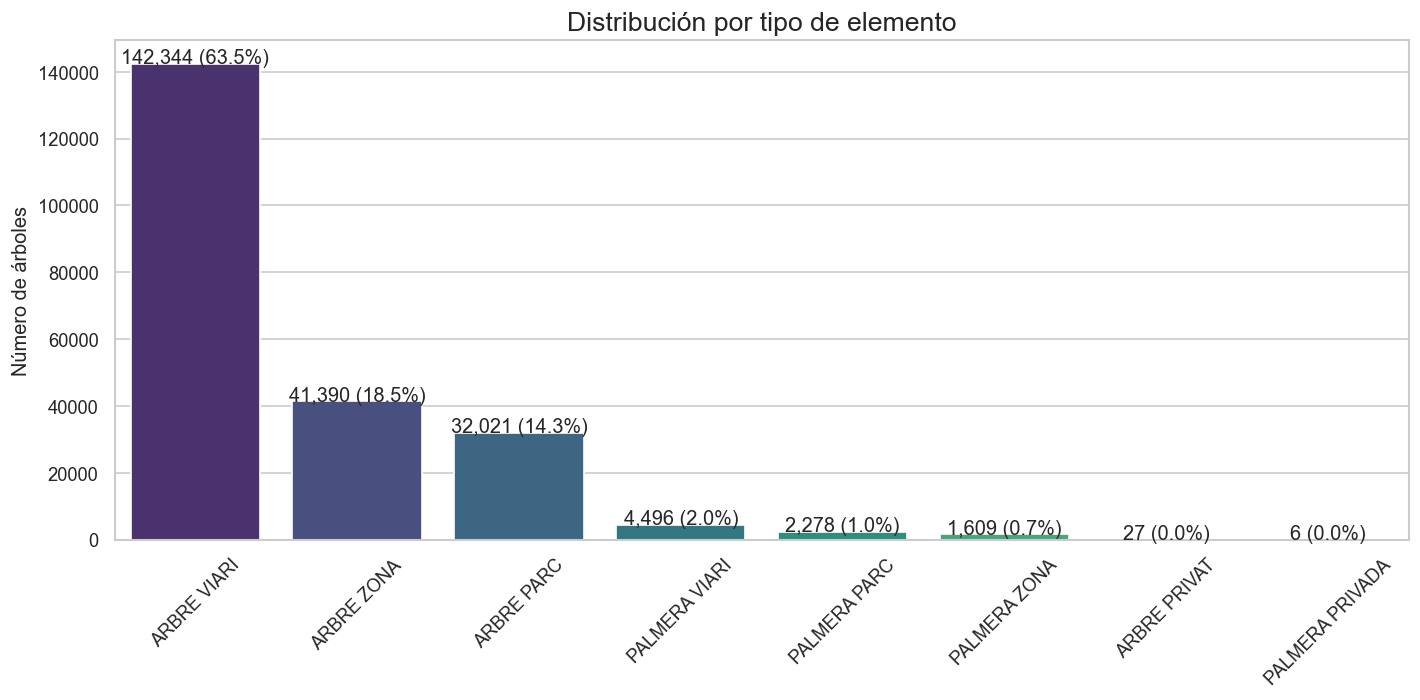

In [320]:
plt.figure(figsize=(12, 6))
tipo_counts = df['tipus_element'].value_counts()
ax = sns.barplot(x=tipo_counts.index, y=tipo_counts.values, palette='viridis')

# Añadir valores y porcentajes
for i, v in enumerate(tipo_counts.values):
    ax.text(i, v + 100, f"{v:,} ({v/len(df)*100:.1f}%)", ha='center')

plt.title('Distribución por tipo de elemento', fontsize=16)
plt.ylabel('Número de árboles')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'tipos_elemento.png'), dpi=300, bbox_inches='tight')
plt.show()


#### 5.3.2 Distribución por categoría de arbolado


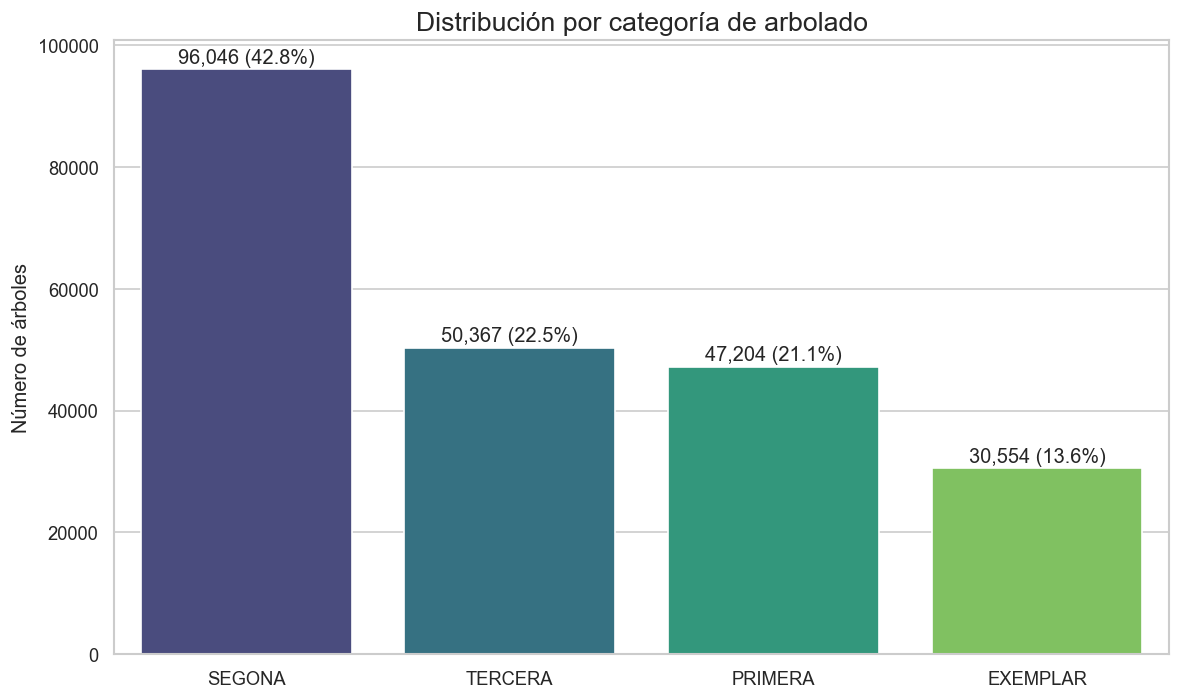

In [321]:
plt.figure(figsize=(10, 6))
categoria_counts = df['categoria_arbrat'].value_counts()
ax = sns.barplot(x=categoria_counts.index, y=categoria_counts.values, palette='viridis')

# Añadir valores y porcentajes
for i, v in enumerate(categoria_counts.values):
    ax.text(i, v + 1000, f"{v:,} ({v/len(df)*100:.1f}%)", ha='center')

plt.title('Distribución por categoría de arbolado', fontsize=16)
plt.ylabel('Número de árboles')
plt.xlabel('')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'categorias_arbolado.png'), dpi=300, bbox_inches='tight')
plt.show()

#### 5.3.3 Relación entre tipo de elemento y categoría de arbolado


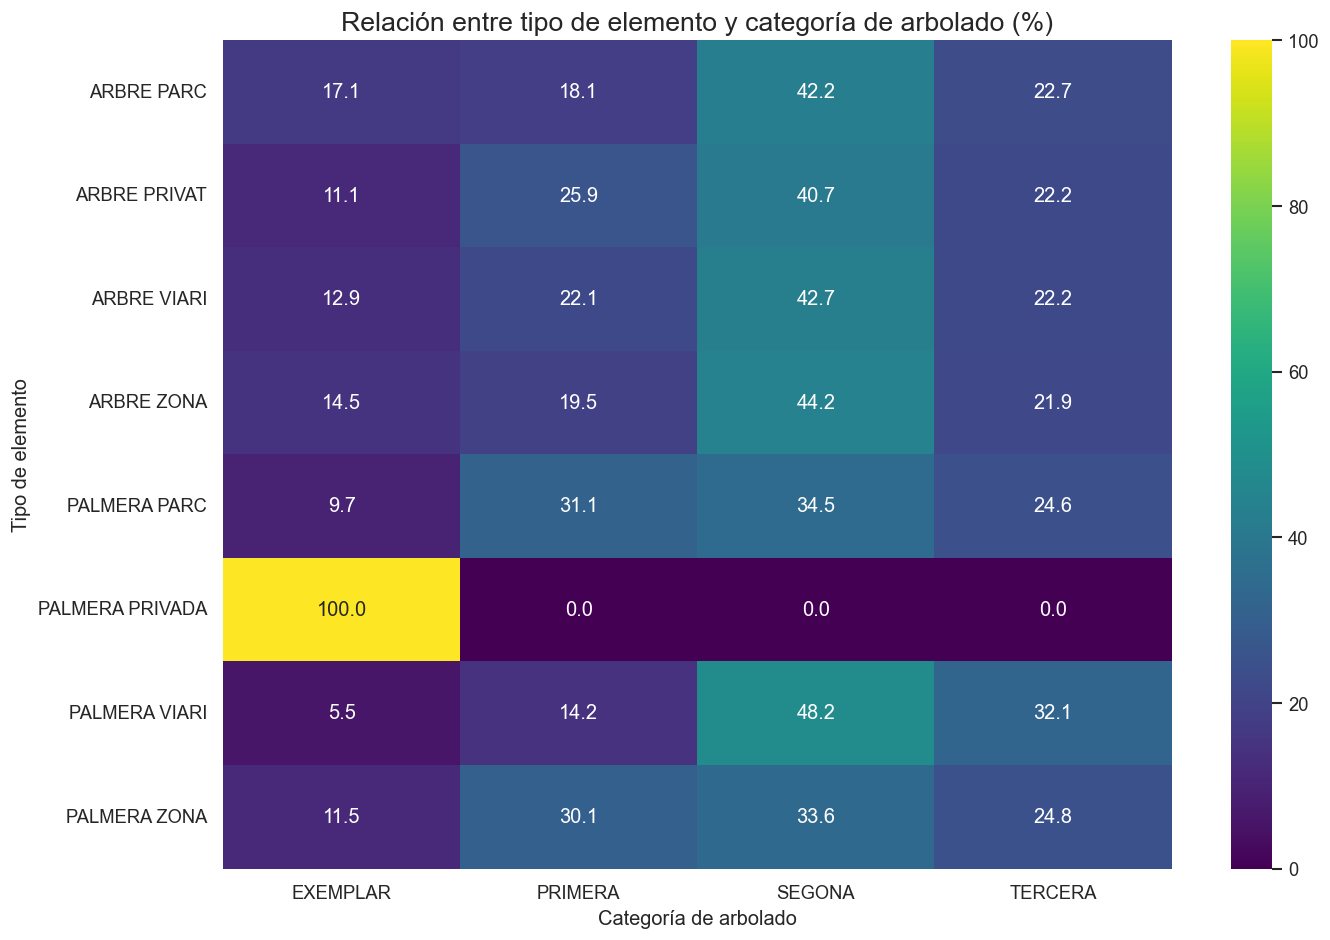

In [322]:
# Crear tabla cruzada
tipo_categoria = pd.crosstab(df['tipus_element'], df['categoria_arbrat'])

# Convertir a porcentajes
tipo_categoria_pct = tipo_categoria.div(tipo_categoria.sum(axis=1), axis=0) * 100

# Crear heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tipo_categoria_pct, annot=True, fmt='.1f', cmap='viridis')
plt.title('Relación entre tipo de elemento y categoría de arbolado (%)', fontsize=16)
plt.xlabel('Categoría de arbolado')
plt.ylabel('Tipo de elemento')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'relacion_tipo_categoria.png'), dpi=300, bbox_inches='tight')
plt.show()


### 5.4 Análisis de riego y mantenimiento


#### 5.4.1 Distribución por sistema de riego


#### 5.4.1 Distribución por sistema de riego


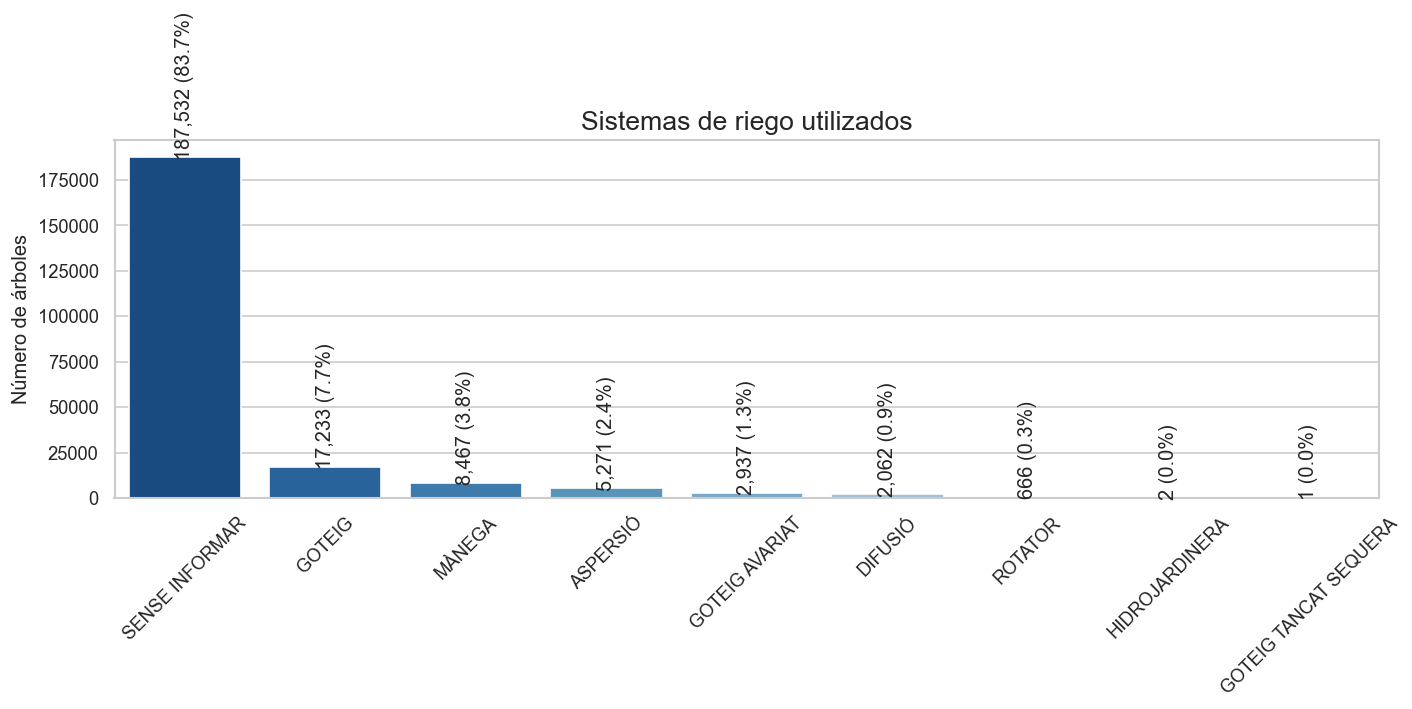

In [323]:
plt.figure(figsize=(12, 6))
riego_counts = df['tipus_reg'].value_counts()
ax = sns.barplot(x=riego_counts.index, y=riego_counts.values, palette='Blues_r')

# Añadir valores y porcentajes
for i, v in enumerate(riego_counts.values):
    ax.text(i, v + 1000, f"{v:,} ({v/len(df)*100:.1f}%)", ha='center', rotation=90)

plt.title('Sistemas de riego utilizados', fontsize=16)
plt.ylabel('Número de árboles')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'sistemas_riego.png'), dpi=300, bbox_inches='tight')
plt.show()

#### 5.4.2 Tipos de agua por tipo de riego


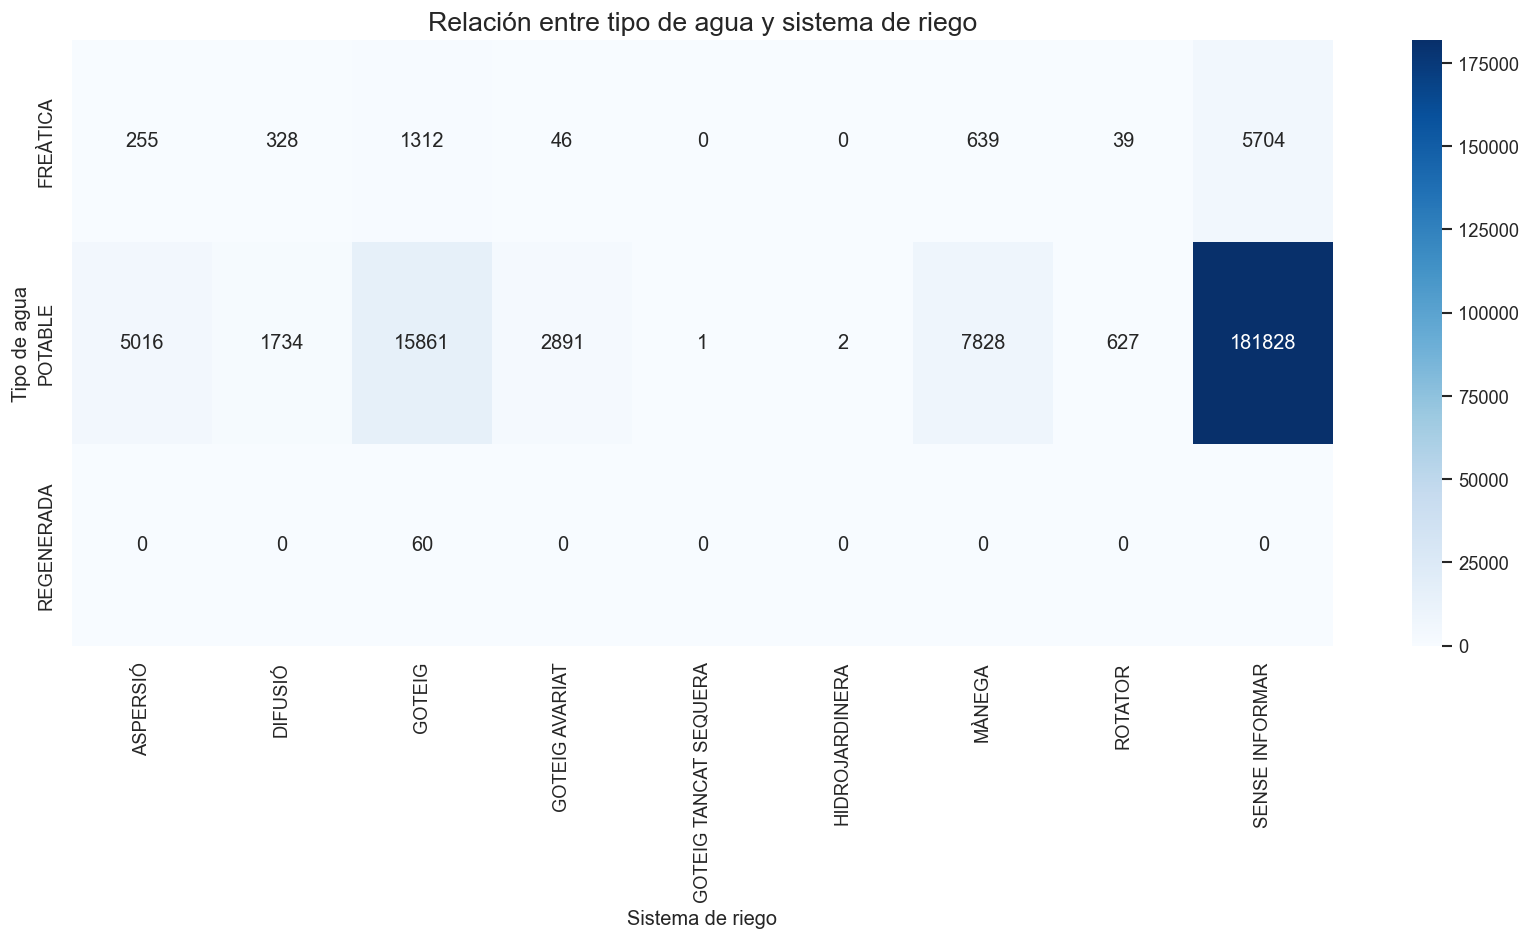

In [324]:
# Crear tabla cruzada
agua_riego = pd.crosstab(df['tipus_aigua'], df['tipus_reg'])

# Visualizar con heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(agua_riego, annot=True, fmt='d', cmap='Blues')
plt.title('Relación entre tipo de agua y sistema de riego', fontsize=16)
plt.ylabel('Tipo de agua')
plt.xlabel('Sistema de riego')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'relacion_agua_riego.png'), dpi=300, bbox_inches='tight')
plt.show()

### 5.5 Análisis temporal


#### 5.5.1 Distribución por año de plantación (para árboles con fecha conocida)


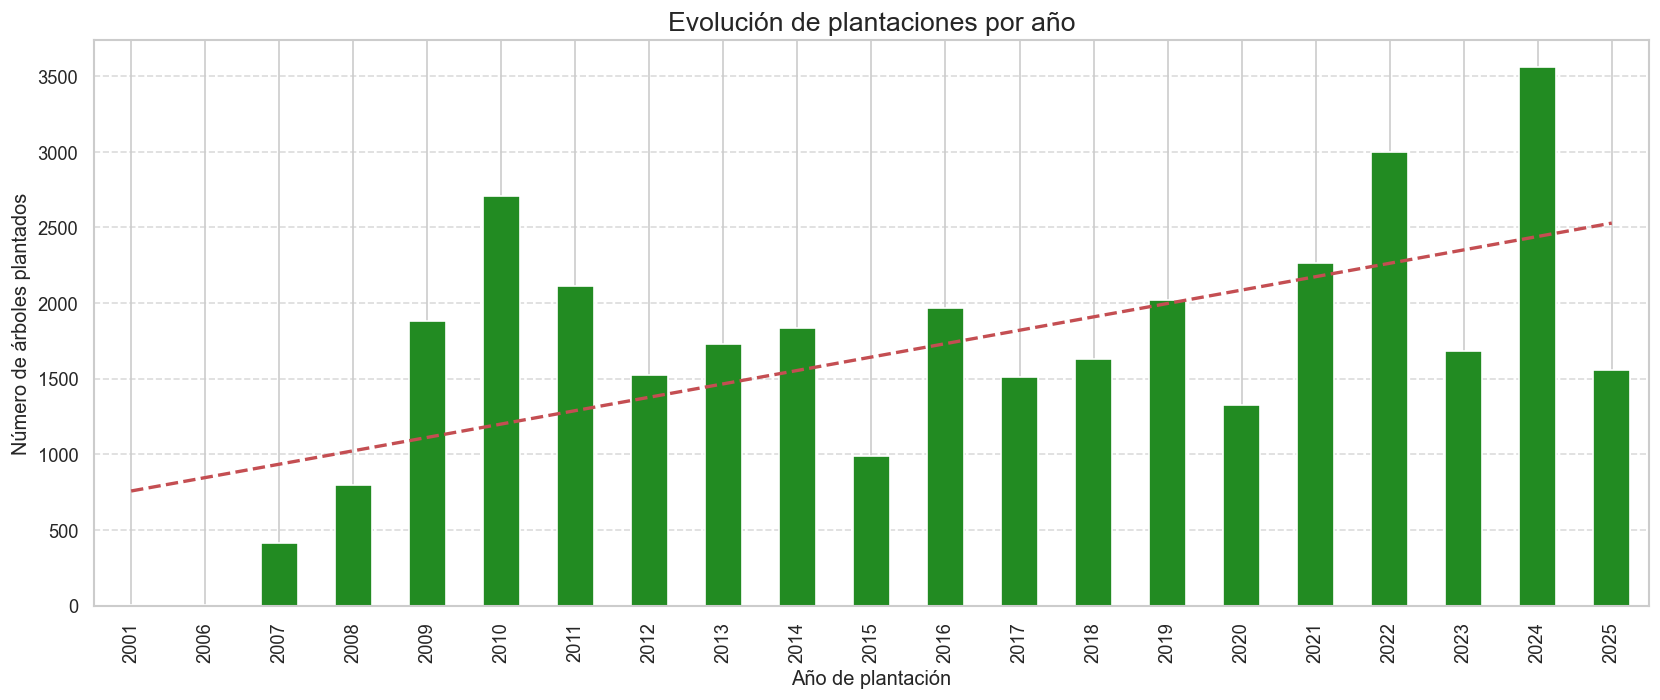

In [325]:
df_con_fecha = df[df['data_coneguda']]
df_con_fecha['año'] = df_con_fecha['data_plantacio'].dt.year

# Agrupar por año
plantaciones_por_año = df_con_fecha.groupby('año').size()

# Visualizar evolución temporal
plt.figure(figsize=(14, 6))
ax = plantaciones_por_año.plot(kind='bar', color='forestgreen')
plt.title('Evolución de plantaciones por año', fontsize=16)
plt.xlabel('Año de plantación')
plt.ylabel('Número de árboles plantados')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una línea de tendencia
z = np.polyfit(range(len(plantaciones_por_año)), plantaciones_por_año.values, 1)
p = np.poly1d(z)
plt.plot(range(len(plantaciones_por_año)), p(range(len(plantaciones_por_año))), "r--", linewidth=2)

plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'plantaciones_por_año.png'), dpi=300, bbox_inches='tight')
plt.show()

#### 5.5.2 Evolución de la selección de especies a lo largo del tiempo


<Figure size 1680x960 with 0 Axes>

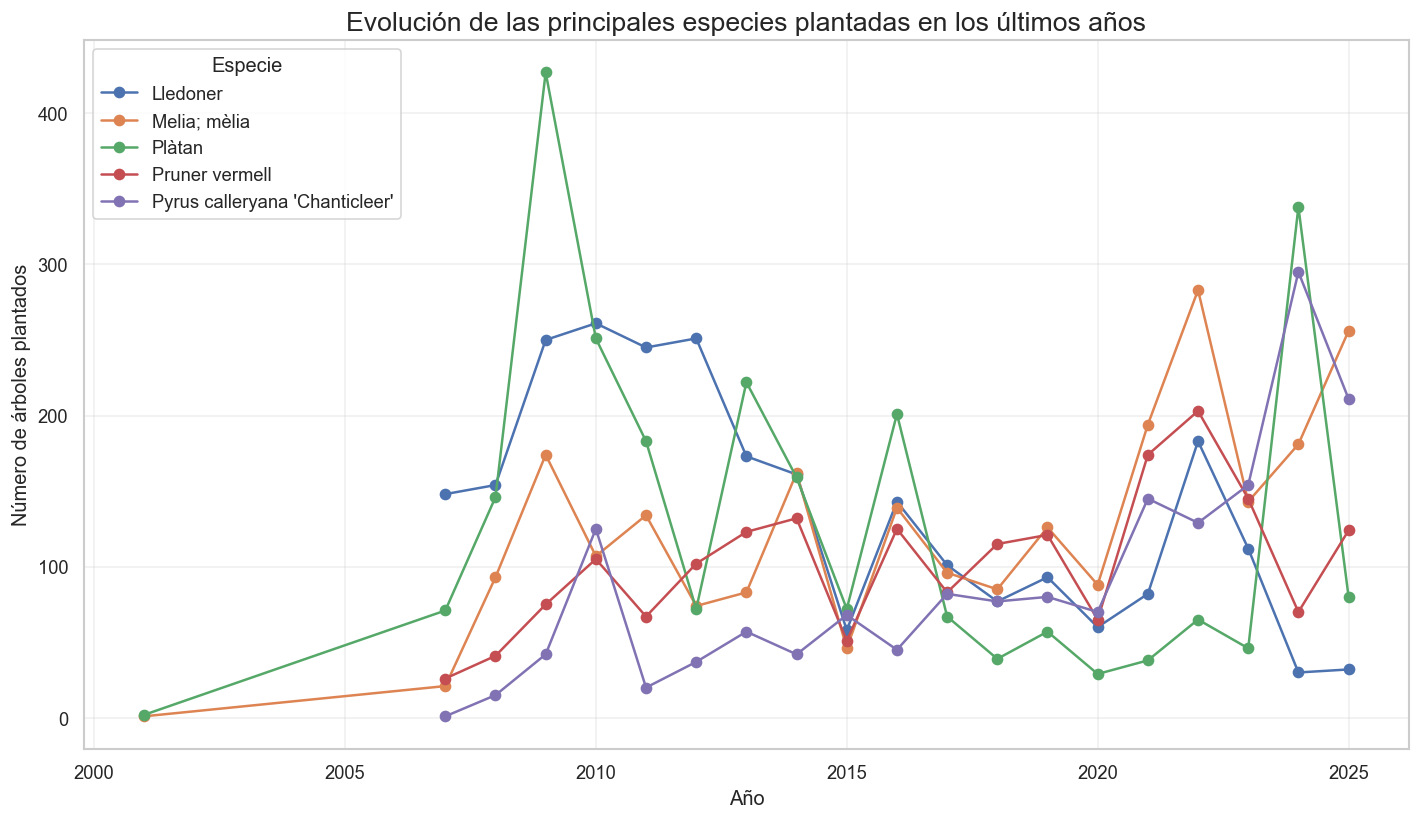

In [326]:
# Seleccionar las 5 especies más plantadas en años recientes
especies_recientes = df_con_fecha[df_con_fecha['año'] >= 2015]['cat_nom_catala'].value_counts().nlargest(5).index

# Filtrar datos para estas especies
df_especies_tiempo = df_con_fecha[df_con_fecha['cat_nom_catala'].isin(especies_recientes)]

# Agrupar por año y especie
especies_tiempo = df_especies_tiempo.groupby(['año', 'cat_nom_catala']).size().unstack()

# Gráfico de evolución
plt.figure(figsize=(14, 8))
especies_tiempo.plot(marker='o')
plt.title('Evolución de las principales especies plantadas en los últimos años', fontsize=16)
plt.xlabel('Año')
plt.ylabel('Número de árboles plantados')
plt.grid(True, alpha=0.3)
plt.legend(title='Especie')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'evolucion_especies.png'), dpi=300, bbox_inches='tight')
plt.show()

### 5.6 Análisis de árboles catalogados


#### 5.6.1 Árboles de interés local por distrito


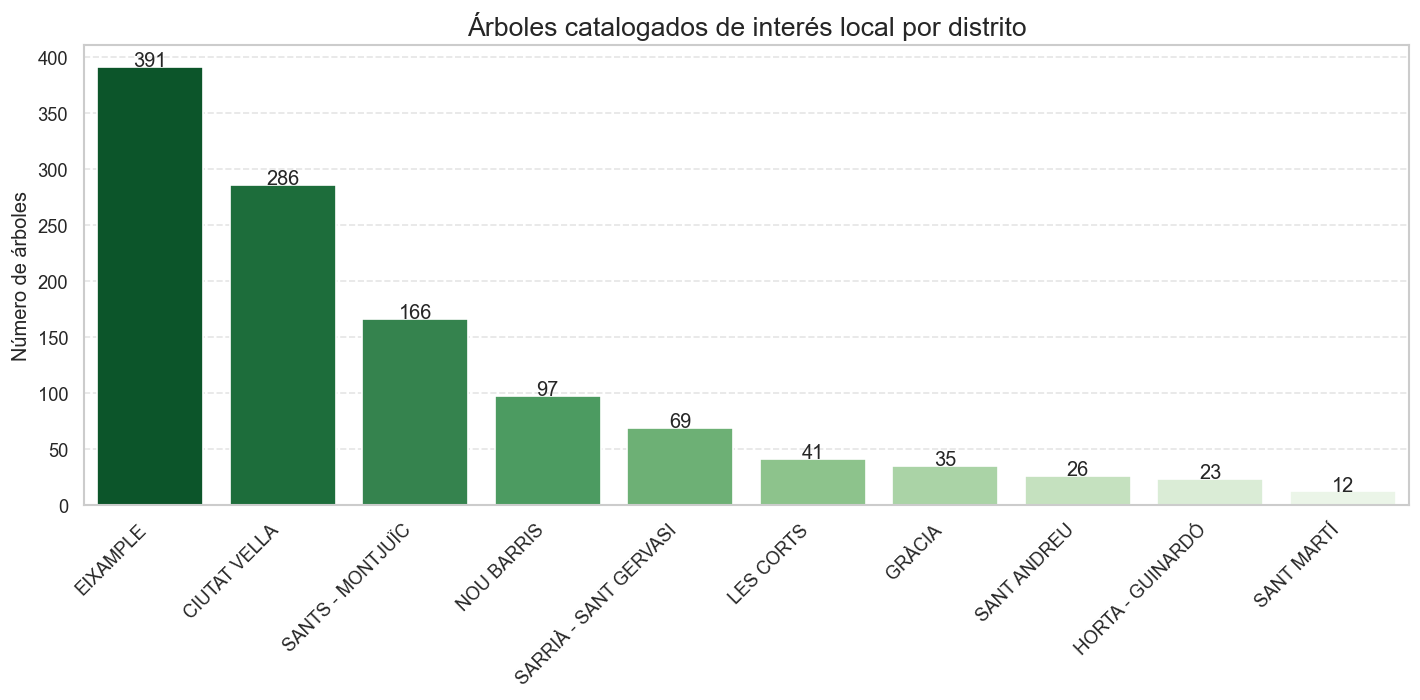

In [327]:
interes_local_distrito = df[df['interes_local']].groupby('nom_districte').size().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=interes_local_distrito.index, y=interes_local_distrito.values, palette='Greens_r')

# Añadir valores sobre las barras
for i, v in enumerate(interes_local_distrito):
    ax.text(i, v + 0.5, str(v), ha='center')

plt.title('Árboles catalogados de interés local por distrito', fontsize=16)
plt.xlabel('')
plt.ylabel('Número de árboles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'interes_local_distrito.png'), dpi=300, bbox_inches='tight')
plt.show()

#### 5.6.2 Comparativa de especies de interés local vs. total


<Figure size 1440x960 with 0 Axes>

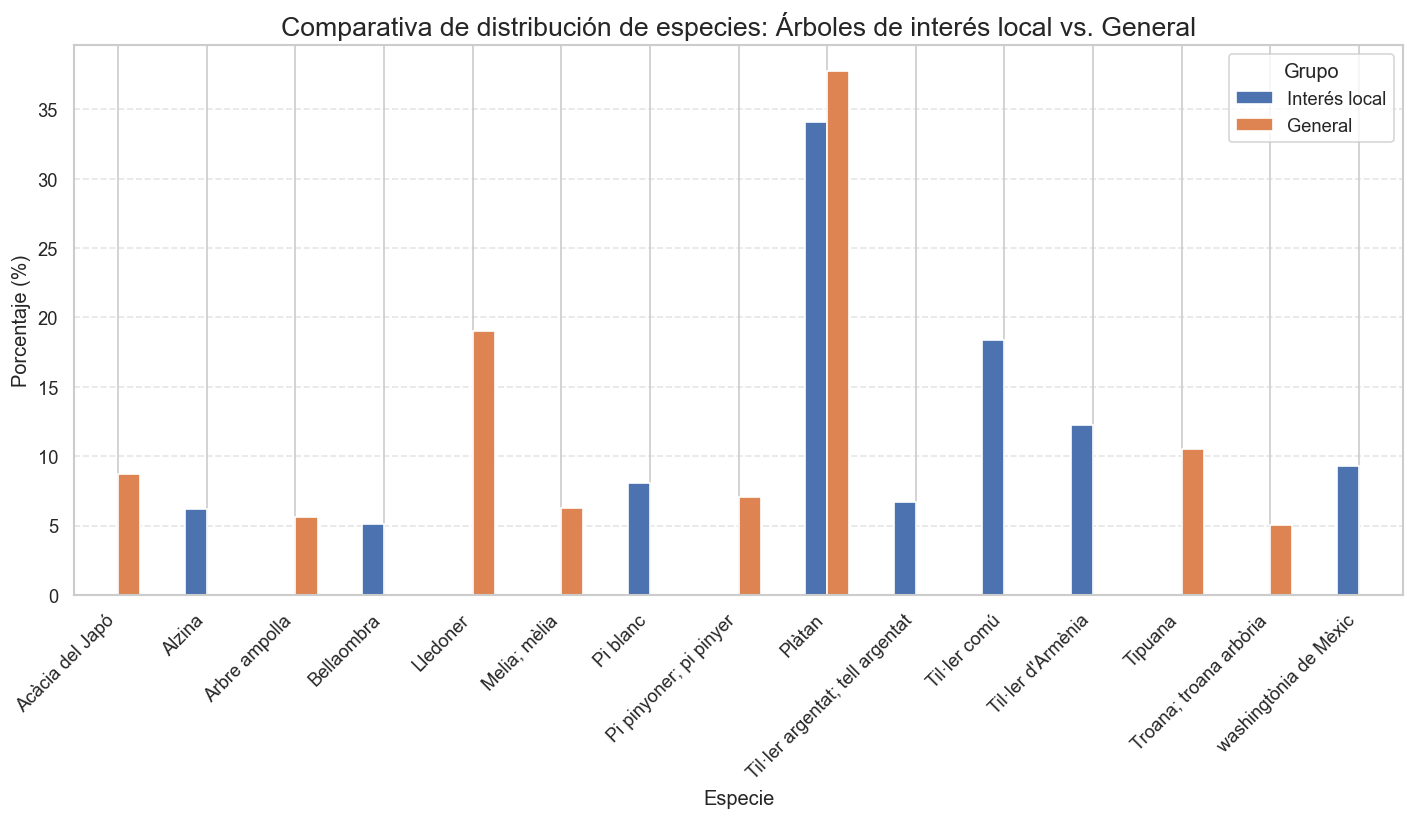

In [328]:
# Especies más comunes entre árboles de interés local
top_especies_interes = df[df['interes_local']]['cat_nom_catala'].value_counts().nlargest(8)
top_especies_general = df['cat_nom_catala'].value_counts().nlargest(8)

# Crear un DataFrame para la comparación
df_comparativa = pd.DataFrame({
    'Interés local': top_especies_interes,
    'General': top_especies_general
})

# Normalizar para comparar proporciones
df_comparativa_norm = df_comparativa.div(df_comparativa.sum()) * 100

# Visualizar comparativa
plt.figure(figsize=(12, 8))
df_comparativa_norm.plot(kind='bar')
plt.title('Comparativa de distribución de especies: Árboles de interés local vs. General', fontsize=16)
plt.xlabel('Especie')
plt.ylabel('Porcentaje (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Grupo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'comparativa_especies_interes.png'), dpi=300, bbox_inches='tight')
plt.show()

### 5.7 Visualizaciones adicionales


#### 5.7.1 Distribución de espacios verdes por tamaño


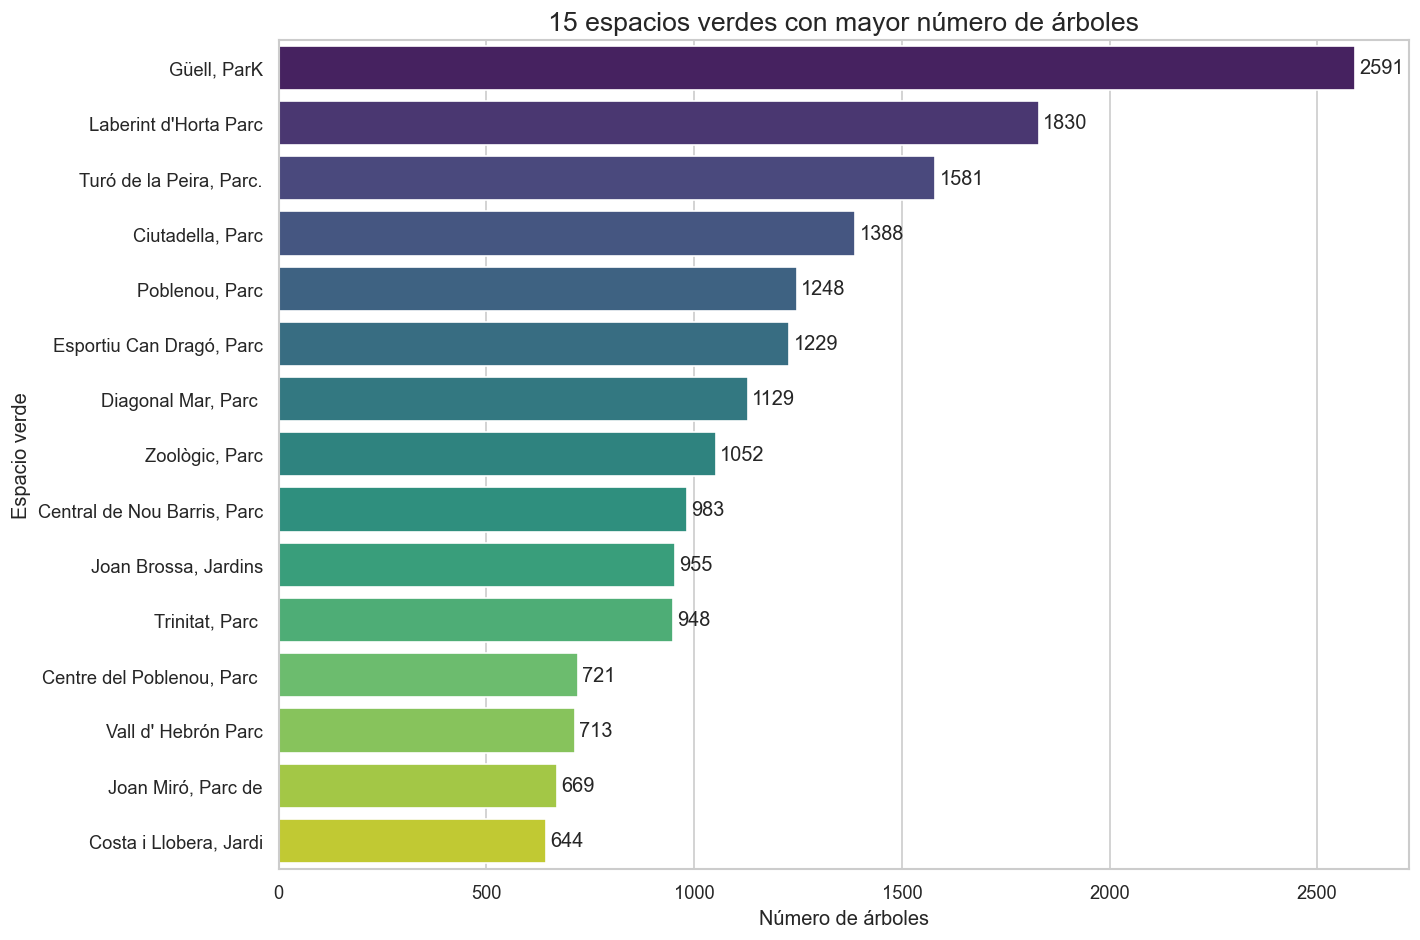

In [329]:
# Contar árboles por espacio verde, excluyendo "Cap"
espacios_verdes = df[df['espai_verd'] != 'Cap']['espai_verd'].value_counts().nlargest(15)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=espacios_verdes.values, y=espacios_verdes.index, palette='viridis')

# Añadir valores a las barras
for i, v in enumerate(espacios_verdes.values):
    ax.text(v + 10, i, str(v), va='center')

plt.title('15 espacios verdes con mayor número de árboles', fontsize=16)
plt.xlabel('Número de árboles')
plt.ylabel('Espacio verde')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'top_espacios_verdes.png'), dpi=300, bbox_inches='tight')
plt.show()

#### 5.7.2 Diversidad de especies por distrito


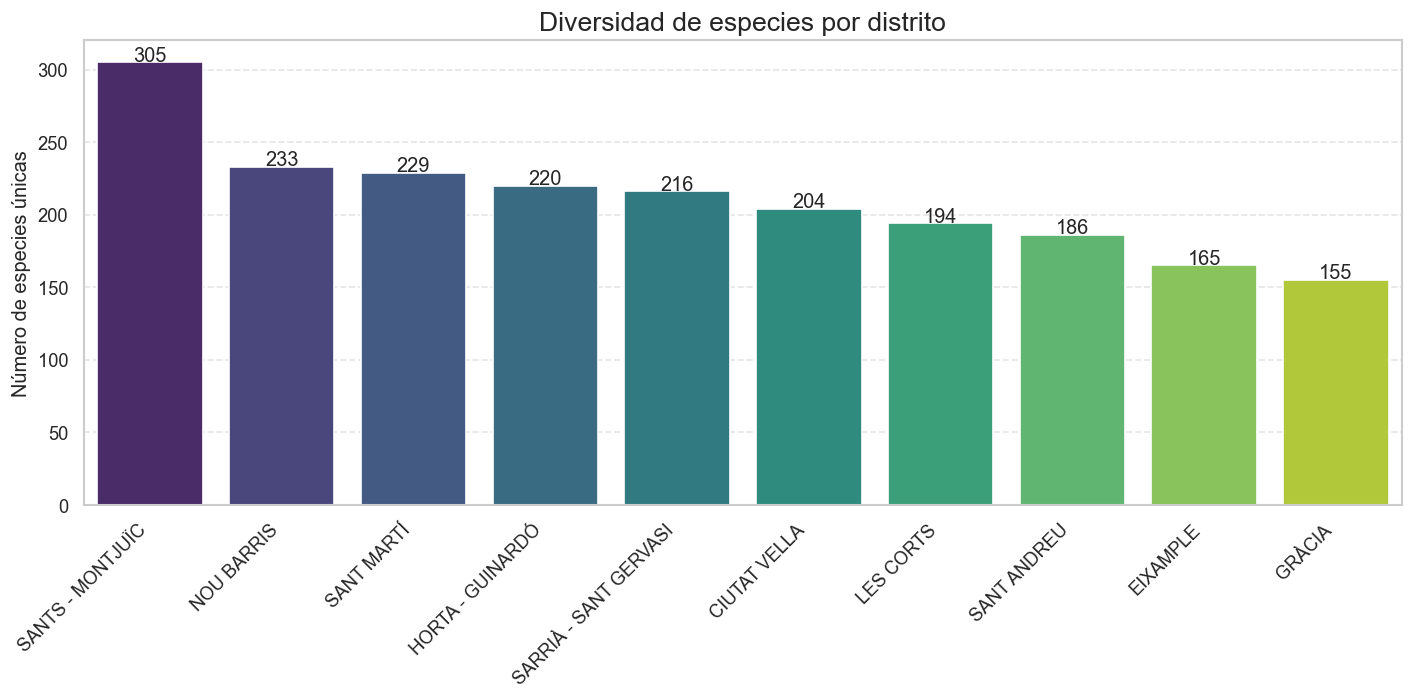

In [330]:
# Calcular número de especies únicas por distrito
diversidad_especies = df.groupby('nom_districte')['cat_nom_catala'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=diversidad_especies.index, y=diversidad_especies.values, palette='viridis')

# Añadir valores sobre las barras
for i, v in enumerate(diversidad_especies):
    ax.text(i, v + 1, str(v), ha='center')

plt.title('Diversidad de especies por distrito', fontsize=16)
plt.xlabel('')
plt.ylabel('Número de especies únicas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'diversidad_distrito.png'), dpi=300, bbox_inches='tight')
plt.show()